# Tarea 4: Personalización

El objetivo de esta tarea es la de realizar una segmentación personalizada de clientes del dataset, basada en los perfiles predefinidos en la Tarea 3 de Segmentación - donde obtuvimos 3 categorías principales - con el fin de optimizar futuras campañas de email marketing mediante demográficos y financieros claramente definidos.

La solicitud fue crear entre 4 y 5 segmentos diferenciados y accionables, enfocados en maximizar la efectividad y rentabilidad de la comunicación dirigida a los clientes actuales de easyMoney.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparación de los Datos

In [ ]:
# Exportamos la base que contiene solo los 100000 registros extraídos por medio del modelo de recomendación de la tarea 3.
pd.set_option('display.max_columns', None)
df_rec=pd.read_pickle('/content/drive/MyDrive/Proyecto_Final/df_recomendado.pkl')
df_rec

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
4866192  1388319               0.912480                        0.917205   
42913     762486               0.732833                        0.882906   
1588765  1122437               0.925454                        0.968641   
1712357  1138300               0.691790                        0.612079   
96906    1004255               0.888487                        0.971119   
...          ...                    ...                             ...   
4578799  1361426               0.007408                        0.037085   
2239442  1177629               0.004380                        0.045467   
5891174  1526045               0.739970                        0.659637   
4348971  1343541               0.211565                        0.253224   
2599223  1202701               0.557547                        0.596646   

         new_prestamos_tarjetas_nextmonth  Rentabilidad  \
4866192                          0.774099     92.258949   
42913                            0.784205     89.696899   
1588765                          0.666849     88.011154   
1712357                          0.924596     86.876823   
96906                            0.633132     85.717529   
...                                   ...           ...   
4578799                          0.679687     42.338680   
2239442                          0.674588     42.337757   
5891174                          0.142404     42.329456   
4348971                          0.501403     42.328781   
2599223                          0.214773     42.327663   

                              Recomendado  active_customer  hdbscan_cluster  
4866192    new_ahorro_inversion_nextmonth                1              0.0  
42913      new_ahorro_inversion_nextmonth                1             -1.0  
1588765    new_ahorro_inversion_nextmonth                1              0.0  
1712357  new_prestamos_tarjetas_nextmonth                1             -1.0  
96906      new_ahorro_inversion_nextmonth                1              0.0  
...                                   ...              ...              ...  
4578799  new_prestamos_tarjetas_nextmonth                1              6.0  
2239442  new_prestamos_tarjetas_nextmonth                1              6.0  
5891174             new_account_nextmonth                1              5.0  
4348971  new_prestamos_tarjetas_nextmonth                1              0.0  
2599223    new_ahorro_inversion_nextmonth                1              6.0  

[10000 rows x 8 columns]

In [ ]:
df_last_pkcid = pd.read_pickle('/content/drive/MyDrive/Proyecto_Final/df_last_pkcid3.pkl')
df_last_pkcid

pk_cid pk_partition entry_date entry_channel  active_customer  \
0        635756   2018-07-28 2016-11-12           KAT                1   
1        606127   2018-07-28 2016-12-03           KFA                0   
2        611844   2018-07-28 2018-07-15       Unknown                0   
3        543177   2018-07-28 2016-12-26       Unknown                0   
4        528596   2018-07-28 2018-07-08       Unknown                0   
...         ...          ...        ...           ...              ...   
456368  1166765   2019-05-28 2016-08-14           KHE                0   
456369  1166764   2019-05-28 2016-08-14           KHE                0   
456370  1166763   2019-05-28 2016-08-14           KHE                1   
456371  1166789   2019-05-28 2016-08-14           KHE                0   
456372  1550586   2019-05-28 2019-05-13       Unknown                1   

                   segment  short_term_deposit  loans  mortgage  funds  \
0        02 - PARTICULARES                   0      0         0      0   
1                  Unknown                   0      0         0      0   
2                  Unknown                   0      0         0      0   
3                  Unknown                   0      0         0      0   
4                  Unknown                   0      0         0      0   
...                    ...                 ...    ...       ...    ...   
456368  03 - UNIVERSITARIO                   0      0         0      0   
456369  03 - UNIVERSITARIO                   0      0         0      0   
456370   02 - PARTICULARES                   0      0         0      0   
456371  03 - UNIVERSITARIO                   0      0         0      0   
456372             Unknown                   0      0         0      0   

        securities  long_term_deposit  em_account_pp  credit_card  payroll  \
0                0                  0              0            0        0   
1                0                  0              0            0        0   
2                0                  0              0            0        0   
3                0                  0              0            0        0   
4                0                  0              0            0        0   
...            ...                ...            ...          ...      ...   
456368           0                  0              0            0        0   
456369           0                  0              0            0        0   
456370           0                  0              0            0        0   
456371           0                  0              0            0        0   
456372           0                  0              0            0        0   

        pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
0                  0                0            0           0             0   
1                  0                0            0           0             0   
2                  0                0            0           0             0   
3                  0                0            0           0             0   
4                  0                0            0           0             0   
...              ...              ...          ...         ...           ...   
456368             0                0            0           0             0   
456369             0                0            0           0             0   
456370             0                0            0           0             0   
456371             0                0            0           0             0   
456372             0                0            0           0             0   

        em_acount country_id  region_code  gender  age  deceased  salary  \
0               0         ES           28       0   41         0  107223   
1               0         ES           28       1   78         0   88654   
2               0         ES           29       1   39         0   88654   
3               0         ES 

In [ ]:
# Realizamos left join a ambos dfs
df_rec_full = pd.merge(df_rec, df_last_pkcid, on='pk_cid', how='left')
df_rec_full

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
0     1388319               0.912480                        0.917205   
1      762486               0.732833                        0.882906   
2     1122437               0.925454                        0.968641   
3     1138300               0.691790                        0.612079   
4     1004255               0.888487                        0.971119   
...       ...                    ...                             ...   
9995  1361426               0.007408                        0.037085   
9996  1177629               0.004380                        0.045467   
9997  1526045               0.739970                        0.659637   
9998  1343541               0.211565                        0.253224   
9999  1202701               0.557547                        0.596646   

      new_prestamos_tarjetas_nextmonth  Rentabilidad  \
0                             0.774099     92.258949   
1                             0.784205     89.696899   
2                             0.666849     88.011154   
3                             0.924596     86.876823   
4                             0.633132     85.717529   
...                                ...           ...   
9995                          0.679687     42.338680   
9996                          0.674588     42.337757   
9997                          0.142404     42.329456   
9998                          0.501403     42.328781   
9999                          0.214773     42.327663   

                           Recomendado  active_customer_x  hdbscan_cluster  \
0       new_ahorro_inversion_nextmonth                  1              0.0   
1       new_ahorro_inversion_nextmonth                  1             -1.0   
2       new_ahorro_inversion_nextmonth                  1              0.0   
3     new_prestamos_tarjetas_nextmonth                  1             -1.0   
4       new_ahorro_inversion_nextmonth                  1              0.0   
...                                ...                ...              ...   
9995  new_prestamos_tarjetas_nextmonth                  1              6.0   
9996  new_prestamos_tarjetas_nextmonth                  1              6.0   
9997             new_account_nextmonth                  1              5.0   
9998  new_prestamos_tarjetas_nextmonth                  1              0.0   
9999    new_ahorro_inversion_nextmonth                  1              6.0   

     pk_partition entry_date entry_channel  active_customer_y  \
0      2019-05-28 2018-03-18           KHK                  1   
1      2019-05-28 2015-07-12           KFC                  1   
2      2019-05-28 2016-02-21           KAT                  1   
3      2019-05-28 2016-06-24           KFC                  1   
4      2019-05-28 2015-02-06           KFC                  1   
...           ...        ...           ...                ...   
9995   2019-05-28 2017-11-26           KHE                  1   
9996   2019-05-28 2016-09-17           KHE                  1   
9997   2019-05-28 2019-01-20           KHM                  1   
9998   2019-05-28 2017-10-29           KAT                  1   
9999   2019-05-28 2016-10-18           KHE                  1   

                 segment  short_term_deposit  loans  mortgage  funds  \
0      02 - PARTICULARES                   0      0         0      0   
1      02 - PARTICULARES                   0      0         0      0   
2      02 - PARTICULARES                   0      0         0      0   
3      02 - PARTICULARES                   0      0         0      0   
4      02 - PARTICULARES                   0      0         0      0   
...                  ...                 ...    ...       ...    ...   
9995  03 - UNIVERSITARIO                   0      0         0      0   
9996  03 - UNIVERSITARIO                   0      0         0      0   
9997   02 - PARTICULARES                   0      0         0      0   
9998            01 - TOP       

In [ ]:
df_rec_full = df_rec_full.drop(columns=['active_customer_y'])
df_rec_full.rename(columns={'active_customer_x': 'active_customer'}, inplace=True)

In [ ]:
# Verificamos que tengamos 10000 ids únicos
df_rec_full['pk_cid'].value_counts()

pk_cid
159282     1
1078216    1
1131397    1
1508025    1
1015730    1
          ..
1004255    1
1138300    1
1122437    1
762486     1
1388319    1
Name: count, Length: 10000, dtype: int64

In [ ]:
df_rec_full.rename(columns={
    'Rentabilidad': "rentabilidad",
    'Recomendado': 'recomendado',
    'antigüedad_cliente' : 'antiguedad_cliente'
}, inplace=True)
df_rec_full

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
0     1388319               0.912480                        0.917205   
1      762486               0.732833                        0.882906   
2     1122437               0.925454                        0.968641   
3     1138300               0.691790                        0.612079   
4     1004255               0.888487                        0.971119   
...       ...                    ...                             ...   
9995  1361426               0.007408                        0.037085   
9996  1177629               0.004380                        0.045467   
9997  1526045               0.739970                        0.659637   
9998  1343541               0.211565                        0.253224   
9999  1202701               0.557547                        0.596646   

      new_prestamos_tarjetas_nextmonth  rentabilidad  \
0                             0.774099     92.258949   
1                             0.784205     89.696899   
2                             0.666849     88.011154   
3                             0.924596     86.876823   
4                             0.633132     85.717529   
...                                ...           ...   
9995                          0.679687     42.338680   
9996                          0.674588     42.337757   
9997                          0.142404     42.329456   
9998                          0.501403     42.328781   
9999                          0.214773     42.327663   

                           recomendado  active_customer  hdbscan_cluster  \
0       new_ahorro_inversion_nextmonth                1              0.0   
1       new_ahorro_inversion_nextmonth                1             -1.0   
2       new_ahorro_inversion_nextmonth                1              0.0   
3     new_prestamos_tarjetas_nextmonth                1             -1.0   
4       new_ahorro_inversion_nextmonth                1              0.0   
...                                ...              ...              ...   
9995  new_prestamos_tarjetas_nextmonth                1              6.0   
9996  new_prestamos_tarjetas_nextmonth                1              6.0   
9997             new_account_nextmonth                1              5.0   
9998  new_prestamos_tarjetas_nextmonth                1              0.0   
9999    new_ahorro_inversion_nextmonth                1              6.0   

     pk_partition entry_date entry_channel             segment  \
0      2019-05-28 2018-03-18           KHK   02 - PARTICULARES   
1      2019-05-28 2015-07-12           KFC   02 - PARTICULARES   
2      2019-05-28 2016-02-21           KAT   02 - PARTICULARES   
3      2019-05-28 2016-06-24           KFC   02 - PARTICULARES   
4      2019-05-28 2015-02-06           KFC   02 - PARTICULARES   
...           ...        ...           ...                 ...   
9995   2019-05-28 2017-11-26           KHE  03 - UNIVERSITARIO   
9996   2019-05-28 2016-09-17           KHE  03 - UNIVERSITARIO   
9997   2019-05-28 2019-01-20           KHM   02 - PARTICULARES   
9998   2019-05-28 2017-10-29           KAT            01 - TOP   
9999   2019-05-28 2016-10-18           KHE  03 - UNIVERSITARIO   

      short_term_deposit  loans  mortgage  funds  securities  \
0                      0      0         0      0           0   
1                      0      0         0      0           0   
2                      0      0         0      0           0   
3                      0      0         0      0           0   
4                      0      0         0      0           0   
...                  ...    ...       ...    ...         ...   
9995                   0      0         0      0           0   
9996                   0      0         0      0           0   
9997                   0      0         0      0           0   
9998                   0      0         0      0           0   
9999                   0      0         0      0           

In [ ]:
df_rec_full.reset_index(drop=True, inplace=True)
df_rec_full

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
0     1388319               0.912480                        0.917205   
1      762486               0.732833                        0.882906   
2     1122437               0.925454                        0.968641   
3     1138300               0.691790                        0.612079   
4     1004255               0.888487                        0.971119   
...       ...                    ...                             ...   
9995  1361426               0.007408                        0.037085   
9996  1177629               0.004380                        0.045467   
9997  1526045               0.739970                        0.659637   
9998  1343541               0.211565                        0.253224   
9999  1202701               0.557547                        0.596646   

      new_prestamos_tarjetas_nextmonth  rentabilidad  \
0                             0.774099     92.258949   
1                             0.784205     89.696899   
2                             0.666849     88.011154   
3                             0.924596     86.876823   
4                             0.633132     85.717529   
...                                ...           ...   
9995                          0.679687     42.338680   
9996                          0.674588     42.337757   
9997                          0.142404     42.329456   
9998                          0.501403     42.328781   
9999                          0.214773     42.327663   

                           recomendado  active_customer  hdbscan_cluster  \
0       new_ahorro_inversion_nextmonth                1              0.0   
1       new_ahorro_inversion_nextmonth                1             -1.0   
2       new_ahorro_inversion_nextmonth                1              0.0   
3     new_prestamos_tarjetas_nextmonth                1             -1.0   
4       new_ahorro_inversion_nextmonth                1              0.0   
...                                ...              ...              ...   
9995  new_prestamos_tarjetas_nextmonth                1              6.0   
9996  new_prestamos_tarjetas_nextmonth                1              6.0   
9997             new_account_nextmonth                1              5.0   
9998  new_prestamos_tarjetas_nextmonth                1              0.0   
9999    new_ahorro_inversion_nextmonth                1              6.0   

     pk_partition entry_date entry_channel             segment  \
0      2019-05-28 2018-03-18           KHK   02 - PARTICULARES   
1      2019-05-28 2015-07-12           KFC   02 - PARTICULARES   
2      2019-05-28 2016-02-21           KAT   02 - PARTICULARES   
3      2019-05-28 2016-06-24           KFC   02 - PARTICULARES   
4      2019-05-28 2015-02-06           KFC   02 - PARTICULARES   
...           ...        ...           ...                 ...   
9995   2019-05-28 2017-11-26           KHE  03 - UNIVERSITARIO   
9996   2019-05-28 2016-09-17           KHE  03 - UNIVERSITARIO   
9997   2019-05-28 2019-01-20           KHM   02 - PARTICULARES   
9998   2019-05-28 2017-10-29           KAT            01 - TOP   
9999   2019-05-28 2016-10-18           KHE  03 - UNIVERSITARIO   

      short_term_deposit  loans  mortgage  funds  securities  \
0                      0      0         0      0           0   
1                      0      0         0      0           0   
2                      0      0         0      0           0   
3                      0      0         0      0           0   
4                      0      0         0      0           0   
...                  ...    ...       ...    ...         ...   
9995                   0      0         0      0           0   
9996                   0      0         0      0           0   
9997                   0      0         0      0           0   
9998                   0      0         0      0           0   
9999                   0      0         0      0           

# Análisis Exploratorio

In [ ]:
df_rec_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   pk_cid                            10000 non-null  object        
 1   new_account_nextmonth             10000 non-null  float32       
 2   new_ahorro_inversion_nextmonth    10000 non-null  float32       
 3   new_prestamos_tarjetas_nextmonth  10000 non-null  float32       
 4   rentabilidad                      10000 non-null  float32       
 5   recomendado                       10000 non-null  object        
 6   active_customer                   10000 non-null  int8          
 7   hdbscan_cluster                   10000 non-null  float64       
 8   pk_partition                      10000 non-null  datetime64[ns]
 9   entry_date                        10000 non-null  datetime64[ns]
 10  entry_channel                     10000 non-nul

In [ ]:
print(df_rec_full['recomendado'].unique())
print(df_rec_full['segment'].unique())

['new_ahorro_inversion_nextmonth' 'new_prestamos_tarjetas_nextmonth'
 'new_account_nextmonth']
['02 - PARTICULARES', '03 - UNIVERSITARIO', '01 - TOP', 'Unknown']
Categories (4, object): ['01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO', 'Unknown']


In [ ]:
display(df_rec_full['recomendado'].value_counts())
display(df_rec_full['segment'].value_counts())

recomendado
new_prestamos_tarjetas_nextmonth    7768
new_account_nextmonth               1164
new_ahorro_inversion_nextmonth      1068
Name: count, dtype: int64

segment
02 - PARTICULARES     6354
03 - UNIVERSITARIO    2983
01 - TOP               643
Unknown                 20
Name: count, dtype: int64

In [ ]:
# Realizamos LabelEncoder para codificar la variable segment.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_rec_full['segment_encoded'] = le.fit_transform(df_rec_full['segment'])
df_rec_full['recomendado_encoded'] = le.fit_transform(df_rec_full['recomendado'])

In [ ]:
df_rec_full

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
0     1388319               0.912480                        0.917205   
1      762486               0.732833                        0.882906   
2     1122437               0.925454                        0.968641   
3     1138300               0.691790                        0.612079   
4     1004255               0.888487                        0.971119   
...       ...                    ...                             ...   
9995  1361426               0.007408                        0.037085   
9996  1177629               0.004380                        0.045467   
9997  1526045               0.739970                        0.659637   
9998  1343541               0.211565                        0.253224   
9999  1202701               0.557547                        0.596646   

      new_prestamos_tarjetas_nextmonth  rentabilidad  \
0                             0.774099     92.258949   
1                             0.784205     89.696899   
2                             0.666849     88.011154   
3                             0.924596     86.876823   
4                             0.633132     85.717529   
...                                ...           ...   
9995                          0.679687     42.338680   
9996                          0.674588     42.337757   
9997                          0.142404     42.329456   
9998                          0.501403     42.328781   
9999                          0.214773     42.327663   

                           recomendado  active_customer  hdbscan_cluster  \
0       new_ahorro_inversion_nextmonth                1              0.0   
1       new_ahorro_inversion_nextmonth                1             -1.0   
2       new_ahorro_inversion_nextmonth                1              0.0   
3     new_prestamos_tarjetas_nextmonth                1             -1.0   
4       new_ahorro_inversion_nextmonth                1              0.0   
...                                ...              ...              ...   
9995  new_prestamos_tarjetas_nextmonth                1              6.0   
9996  new_prestamos_tarjetas_nextmonth                1              6.0   
9997             new_account_nextmonth                1              5.0   
9998  new_prestamos_tarjetas_nextmonth                1              0.0   
9999    new_ahorro_inversion_nextmonth                1              6.0   

     pk_partition entry_date entry_channel             segment  \
0      2019-05-28 2018-03-18           KHK   02 - PARTICULARES   
1      2019-05-28 2015-07-12           KFC   02 - PARTICULARES   
2      2019-05-28 2016-02-21           KAT   02 - PARTICULARES   
3      2019-05-28 2016-06-24           KFC   02 - PARTICULARES   
4      2019-05-28 2015-02-06           KFC   02 - PARTICULARES   
...           ...        ...           ...                 ...   
9995   2019-05-28 2017-11-26           KHE  03 - UNIVERSITARIO   
9996   2019-05-28 2016-09-17           KHE  03 - UNIVERSITARIO   
9997   2019-05-28 2019-01-20           KHM   02 - PARTICULARES   
9998   2019-05-28 2017-10-29           KAT            01 - TOP   
9999   2019-05-28 2016-10-18           KHE  03 - UNIVERSITARIO   

      short_term_deposit  loans  mortgage  funds  securities  \
0                      0      0         0      0           0   
1                      0      0         0      0           0   
2                      0      0         0      0           0   
3                      0      0         0      0           0   
4                      0      0         0      0           0   
...                  ...    ...       ...    ...         ...   
9995                   0      0         0      0           0   
9996                   0      0         0      0           0   
9997                   0      0         0      0           0   
9998                   0      0         0      0           0   
9999                   0      0         0      0           

In [ ]:
labels = pd.DataFrame({'segment': le.classes_,'label': le.transform(le.classes_)})
labels

segment  label
0             new_account_nextmonth      0
1    new_ahorro_inversion_nextmonth      1
2  new_prestamos_tarjetas_nextmonth      2

### Análisis Cualitativo por Recomendados

In [ ]:
# Definimos las variables de interes para segmentar estos perfiles aún más, buscando generar campañas específicas. También revisamos los percentiles de manera general.
var_int = [ 'age',
     'gender',
     'region_code',
     'segment_encoded',
     'salary',
     'rentabilidad',
     'total_products',
     'antiguedad_cliente',
     'hdbscan_cluster',
     'new_client']

percentiles = df_rec_full.groupby('recomendado')[var_int].quantile([0.25, 0.50, 0.75])
percentiles

age  gender  region_code  \
recomendado                                                        
new_account_nextmonth            0.25  32.0     0.0        18.00   
                                 0.50  36.0     0.0        28.00   
                                 0.75  41.0     1.0        38.00   
new_ahorro_inversion_nextmonth   0.25  30.0     0.0        19.00   
                                 0.50  35.0     0.0        28.00   
                                 0.75  43.0     1.0        30.25   
new_prestamos_tarjetas_nextmonth 0.25  28.0     0.0        17.75   
                                 0.50  35.0     0.0        28.00   
                                 0.75  46.0     1.0        33.00   

                                       segment_encoded     salary  \
recomendado                                                         
new_account_nextmonth            0.25              1.0   65031.50   
                                 0.50              1.0   83438.50   
                                 0.75              1.0   98848.50   
new_ahorro_inversion_nextmonth   0.25              1.0   70694.50   
                                 0.50              1.0   88850.50   
                                 0.75              2.0  130640.25   
new_prestamos_tarjetas_nextmonth 0.25              1.0   73167.25   
                                 0.50              1.0   88654.00   
                                 0.75              2.0  133757.50   

                                       rentabilidad  total_products  \
recomendado                                                           
new_account_nextmonth            0.25     47.507288             3.0   
                                 0.50     51.310530             3.0   
                                 0.75     55.384419             3.0   
new_ahorro_inversion_nextmonth   0.25     47.757912             3.0   
                                 0.50     51.572226             3.0   
                                 0.75     55.897312             3.0   
new_prestamos_tarjetas_nextmonth 0.25     48.269639             1.0   
                                 0.50     52.473742             3.0   
                                 0.75     55.836732             3.0   

                                       antiguedad_cliente  hdbscan_cluster  \
recomendado                                                                  
new_account_nextmonth            0.25              703.75              0.0   
                                 0.50              990.50              0.0   
                                 0.75             1327.25              0.0   
new_ahorro_inversion_nextmonth   0.25              695.50              0.0   
                                 0.50             1038.00              0.0   
                                 0.75             1328.75              0.0   
new_prestamos_tarjetas_nextmonth 0.25              569.00              0.0   
                                 0.50              890.00              0.0   
                                 0.75             1272.75              5.0   

                                       new_client  
recomendado                                        
new_account_nextmonth            0.25         0.0  
                                 0.50         0.0  
                                 0.75         0.0  
new_ahorro_inversion_nextmonth   0.25         0.0  
                                 0.50         0.0  
                                 0.75         0.0  
new_prestamos_tarjetas_nextmonth 0.25         0.0  
                                 0.50         0.0  
                                 0.75         0.0

Notamos que predominan particulares, adultos con media de 35-36 años, mayoritariamente hombres, 3 productos contratados y casi todos del cluster cero (Clientes Top, mayor nº productos y activos).

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


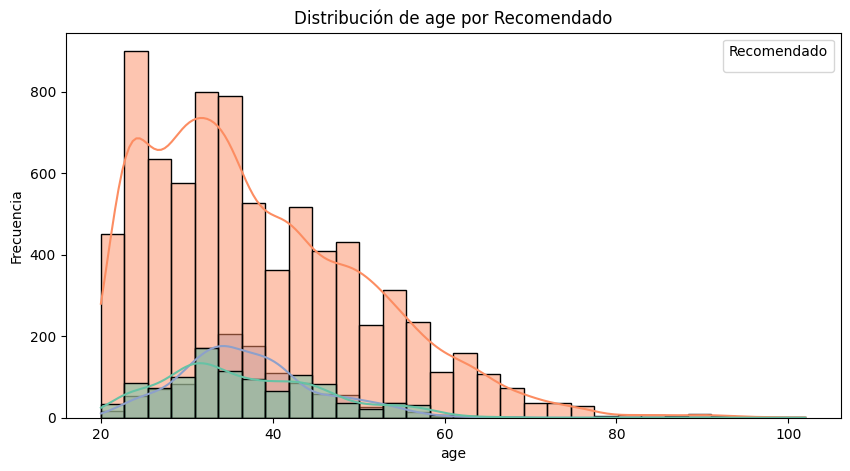

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


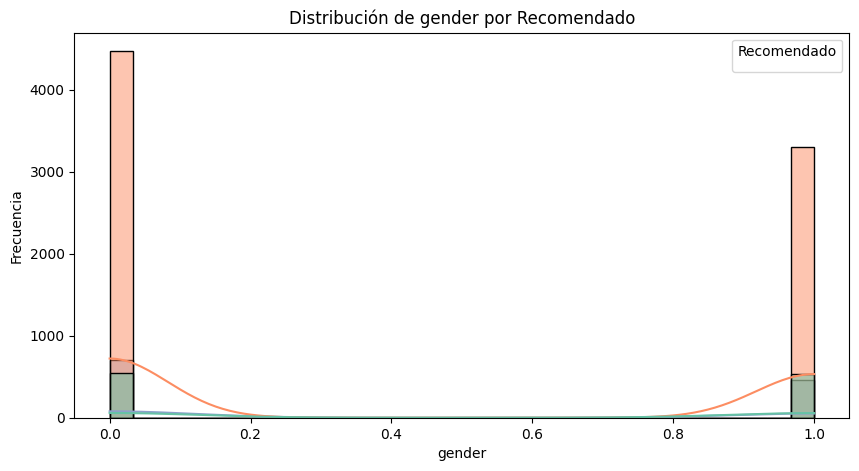

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


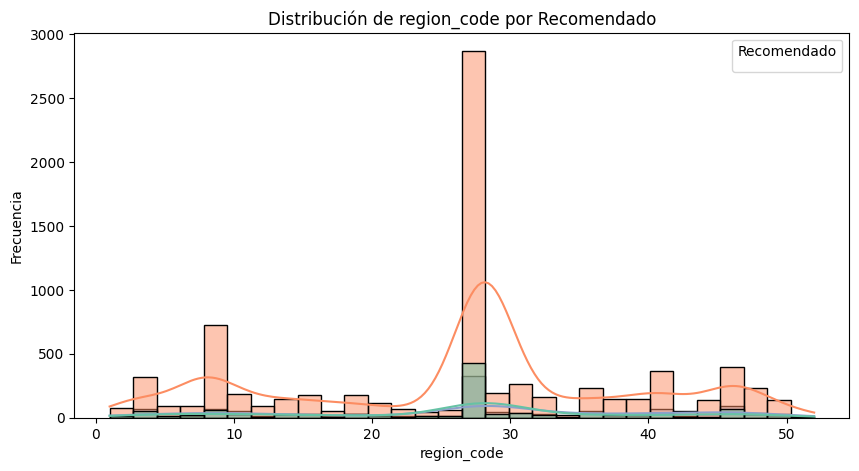

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


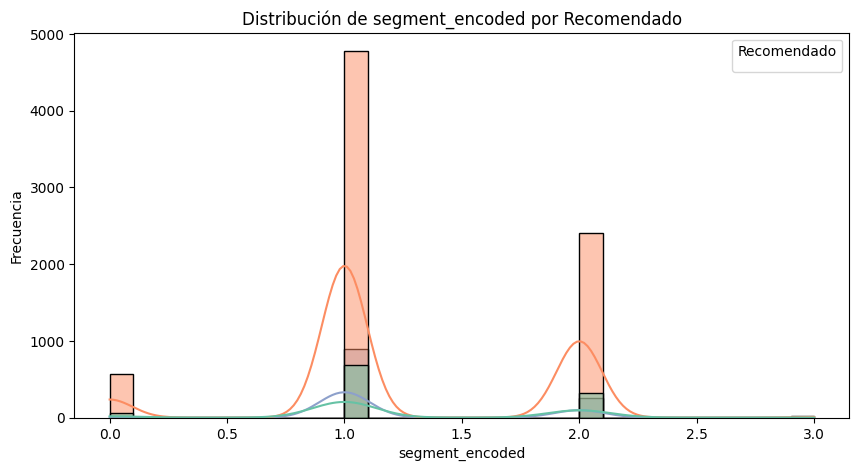

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


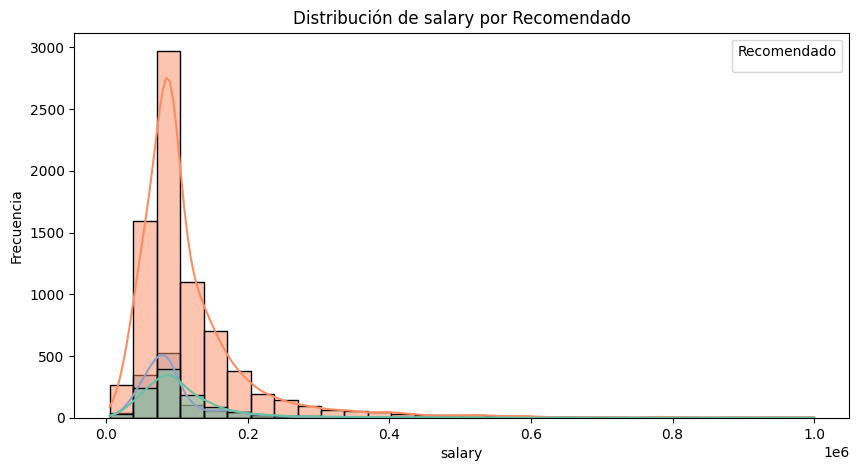

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


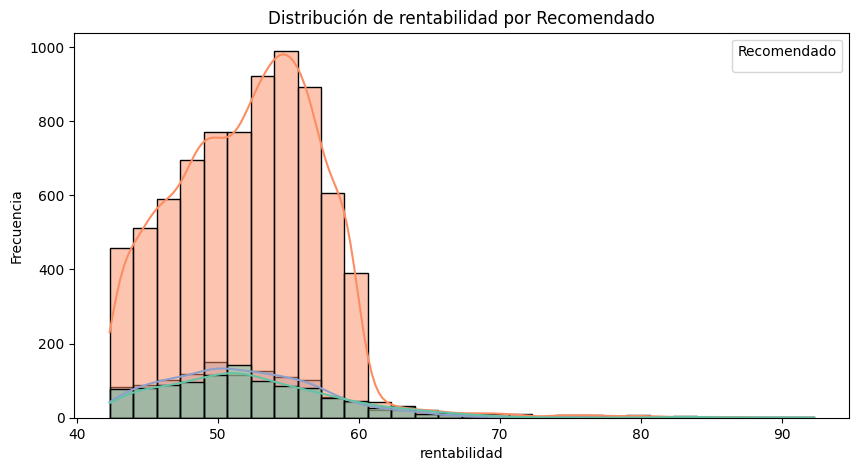

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


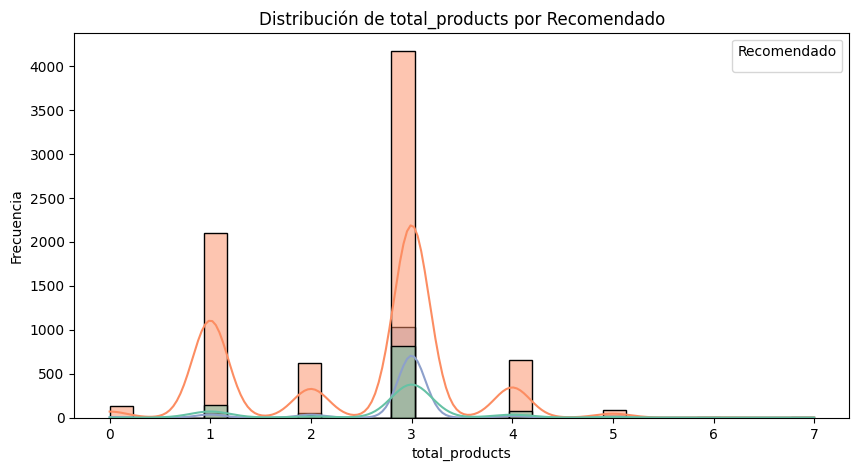

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


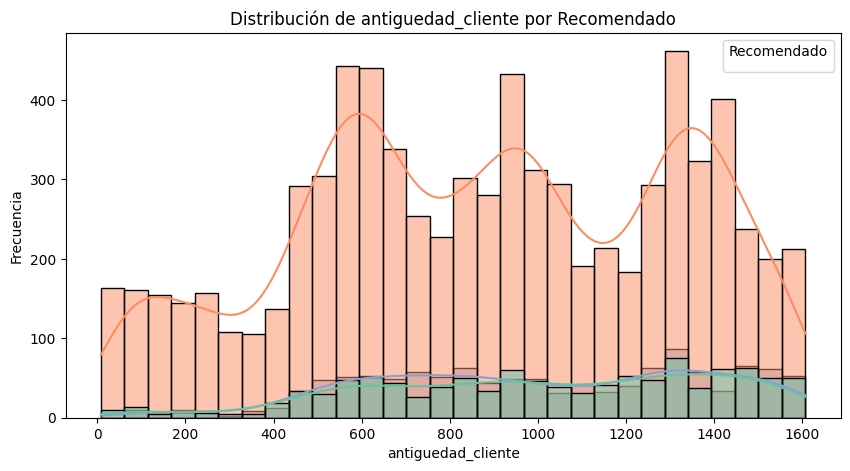

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


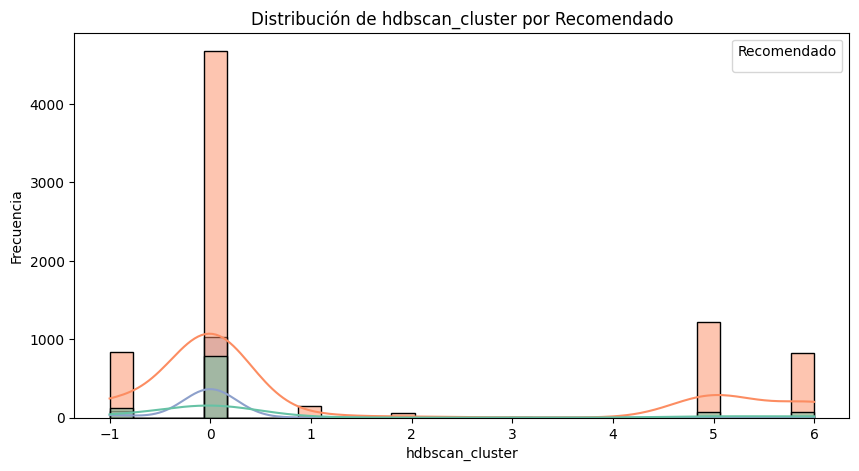

<ipython-input-16-45dc731dd002>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recomendado")


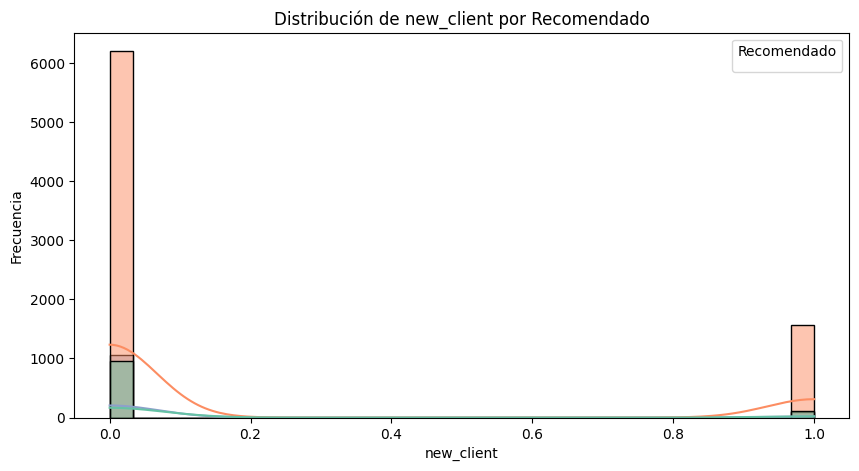

<Figure size 640x480 with 0 Axes>

In [ ]:
# Generamos histogramas por cada grupo de "Recomendado" y las variables de interés.

for var in var_int:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_rec_full, x=var, hue="recomendado", kde=True, bins=30, palette="Set2")
    plt.title(f"Distribución de {var} por Recomendado")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.legend(title="Recomendado")
    plt.show()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Análisis Preliminar: Estos son algunas de las formas en que podríamos segmentar en base a análisis cualitativo de la data.

* age: Mayor parte de los clientes entre 20-35 años, a partir de los 60 son residuales.

* gender: Diferencias posibles, revisar impacto en la segmentación. Más hombres que mujeres.

* region_code: Alta concentración en región 28.

* segment_encoded: Mayoría en Particulares y Universitarios

* salary: Outliers detectados, definir un umbral de alto valor.

* rentabilidad: Umbral en 55 para definir clientes de alto valor.

* total_products: Mayor parte de los clientes con 3 o 1 cuenta.

* antiguedad: Separar en nuevos (<12 meses), intermedios (12 meses-3 años) y fieles (>3 años).

* hdbscan_cluster: Predomina claramente el cluster 0 (clientes TOP). Usuarios en cluster -1 podrían requerir segmentación especial.

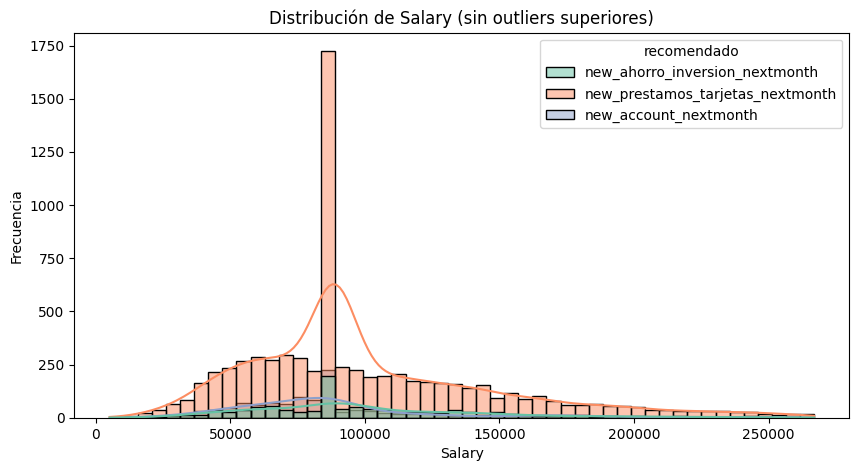

In [ ]:
# Debido a que salary tiene outliers y no se visualiza bien, generamos otra grafica más detallada. Vemos que se concentran mayormente en los 85000$

plt.figure(figsize=(10, 5))
sns.histplot(data=df_rec_full[df_rec_full["salary"] < df_rec_full["salary"].quantile(0.95)],
             x="salary", hue="recomendado", kde=True, bins=50, palette="Set2")
plt.title("Distribución de Salary (sin outliers superiores)")
plt.xlabel("Salary")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
df_rec_full.salary.describe()

count     10000.000000
mean     115555.498900
std       88684.808066
min        5163.000000
25%       71281.000000
50%       88654.000000
75%      129787.500000
max      999927.000000
Name: salary, dtype: float64

Esto nos permite perfilar preliminarmente los siguientes grupos que podemos comparar luego con modelos de aprendizaje. Estos posibles segmentos son muy generales ya que no queremos excluir ninguno de los 10.000 usuarios disponibles de mayor rentabilidad.

Los demográficos de género, region_code no parecen tener una mayor incidencia por lo que nos enfocaremos en segmentación comercial, por edad, segmento, y salario.

Se asume que el principal segmentador será por los recomendados, a partir de ahí sugerimos preliminarmente 2 subsegmentos para cada grupo:

**new_prestamos_tarjetas_nextmonth**

a. Jóvenes universitarios con bajos ingresos: (age < 30 y segment_encoded == 2 y salary <= 50000) -	Universitarios con ingresos bajos, propensos a necesitar crédito.

b.  Adultos particulares con mejor salario:	(age >= 30 y segment_encoded == 1 y salary > 50000) -	Adultos con ingresos más altos y mayor confianza en crédito.

**new_ahorro_inversion_nextmonth**

c. Clientes Top para inversión:	(salary > 100000 o rentabilidad > 55) - Clientes con altos ingresos o rentabilidad, candidatos para ahorro/inversión.

d. Particulares salario medio con potencial de ahorro:	(salary <= 100000 y segment_encoded == 1) -	Clientes de ingresos medios, que pueden necesitar herramientas de ahorro.

**new_account_nextmonth**

 e. Cliente Nuevos y Jóvenes: (age < 30 y segment_encoded == 2) -	Universitarios o jóvenes sin historial bancario que buscan abrir su primera cuenta.

 f. Adultos potenciales para nueva cuenta: (age >= 30 y segment_encoded == 1)	- Clientes particulares que buscan opciones de cuenta.




# Segmentación por Modelos

### Normalización de Variables

In [ ]:
# Iniciamos normalizando los valores de las variables de interés. Hemos excluido 'recomendados', 'hdbscan_cluster ya que debido a su
# naturaleza pre-clasificatoria podría sesgar el modelo. Mantendremos la pre-clasificación de recomendados al momento de modelar.

var_clustering = ['age', 'gender', 'region_code', 'segment_encoded', 'recomendado_encoded', 'salary', 'rentabilidad', 'total_products', 'antiguedad_cliente', 'new_client']

In [ ]:
df_rec_full[var_clustering]

age  gender  region_code  segment_encoded  recomendado_encoded  salary  \
0      53       0           11                1                    1  134865   
1      54       1           28                1                    1   42046   
2      39       1           41                1                    1   84964   
3      55       1           28                1                    2  212071   
4      37       0           35                1                    1   97297   
...   ...     ...          ...              ...                  ...     ...   
9995   26       1           28                2                    2   99050   
9996   23       1           15                2                    2  102557   
9997   43       0           13                1                    0   88654   
9998   62       0           41                0                    2  247546   
9999   23       1           28                2                    1  131774   

      rentabilidad  total_products  antiguedad_cliente  new_client  
0        92.258949               3                 436           1  
1        89.696899               4                1416           0  
2        88.011154               3                1192           0  
3        86.876823               1                1068           0  
4        85.717529               3                1572           0  
...            ...             ...                 ...         ...  
9995     42.338680               1                 548           0  
9996     42.337757               1                 983           0  
9997     42.329456               1                 128           1  
9998     42.328781               3                 576           0  
9999     42.327663               1                 952           0  

[10000 rows x 10 columns]

In [ ]:
# Calculamos la varianza de las variables seleccionadas antes de normalizar
varianza_original = df_rec_full[var_clustering].var().sort_values(ascending=False)
varianza_original

salary                 7.864995e+09
antiguedad_cliente     1.717266e+05
region_code            1.582934e+02
age                    1.434941e+02
rentabilidad           2.976204e+01
total_products         1.012846e+00
recomendado_encoded    4.571176e-01
segment_encoded        3.139874e-01
gender                 2.449551e-01
new_client             1.464594e-01
dtype: float64

In [ ]:
# Eliminamos las variables con varianza <5 y que no sean de vital importancia para el entendimiento de los perfiles.
# Decidimos reducir new_client (ya que se define a partir de antiguedad) y total_products (ya que este valor fue usado
#para definir los recomendados)

var_clustering.remove('new_client')
var_clustering.remove('total_products')

In [ ]:
var_clustering

['age',
 'gender',
 'region_code',
 'segment_encoded',
 'recomendado_encoded',
 'salary',
 'rentabilidad',
 'antiguedad_cliente']

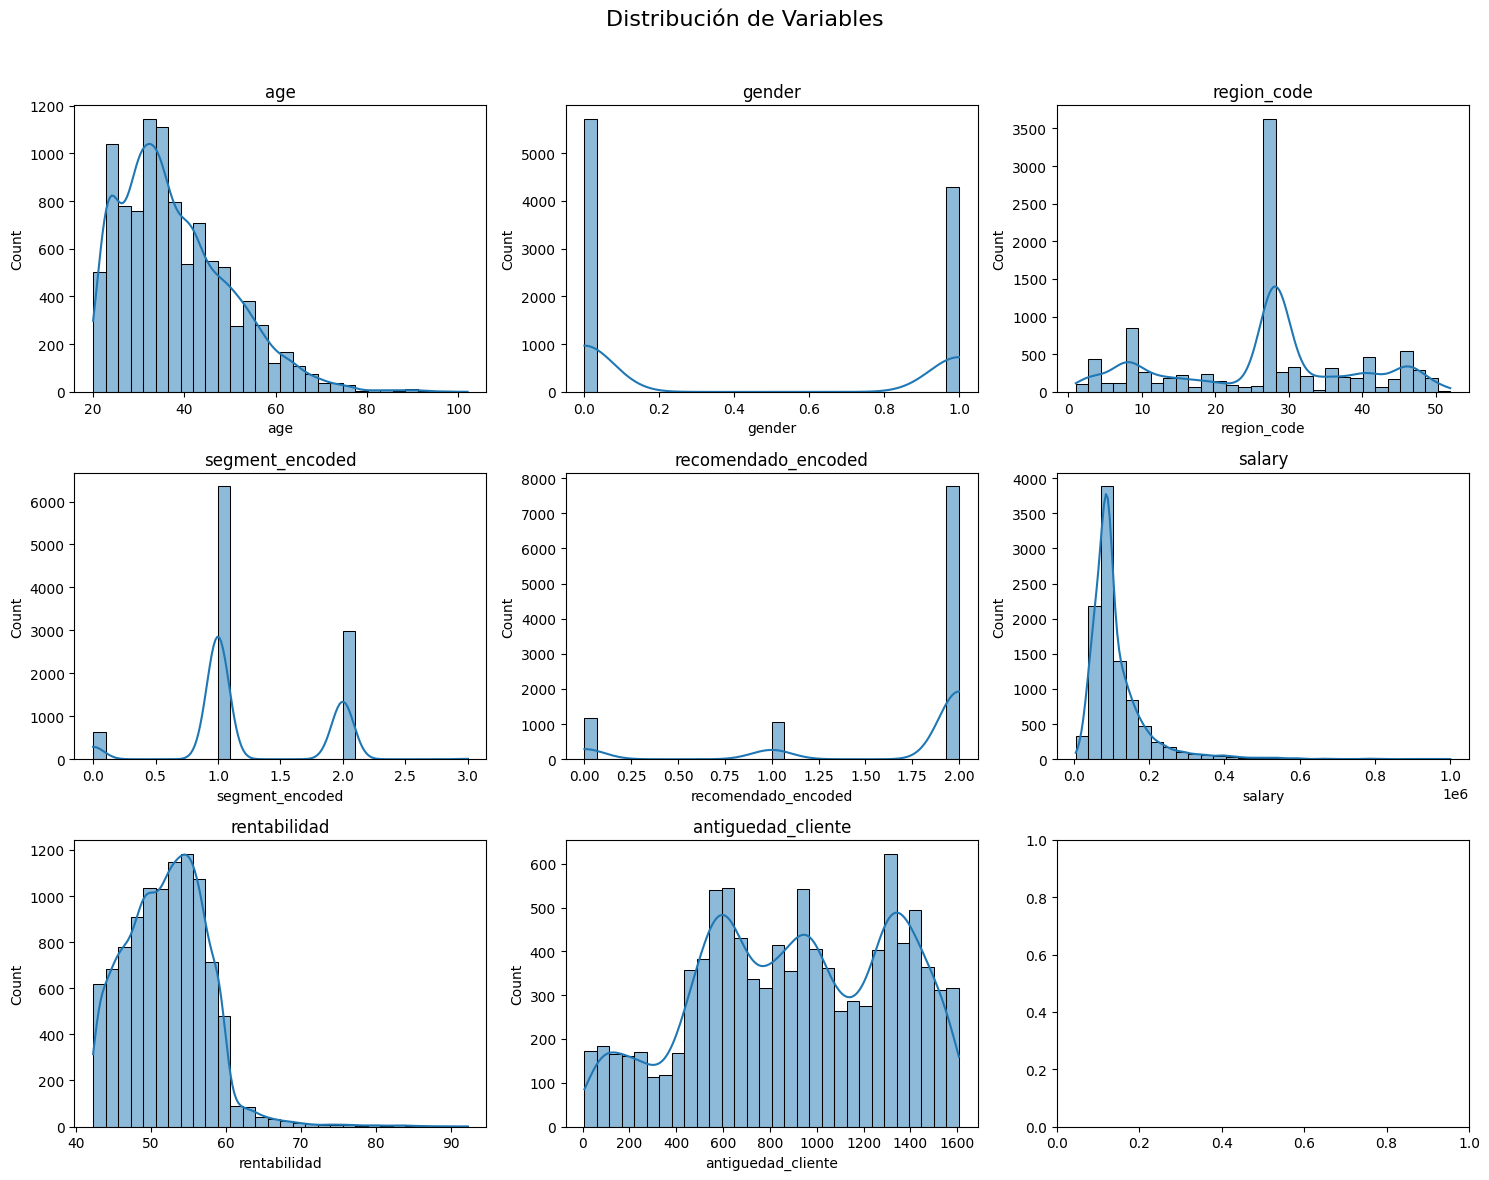

In [ ]:
# Visualizamos las gráficas de las variables

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Distribución de Variables", fontsize=16)

for ax, col in zip(axes.flatten(), var_clustering):
    sns.histplot(df_rec_full[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Al observar la distribución de Region determinamos que no aportaría valor en el modelado ya que esta altamente sesgado a una sola region

var_clustering.remove('region_code')

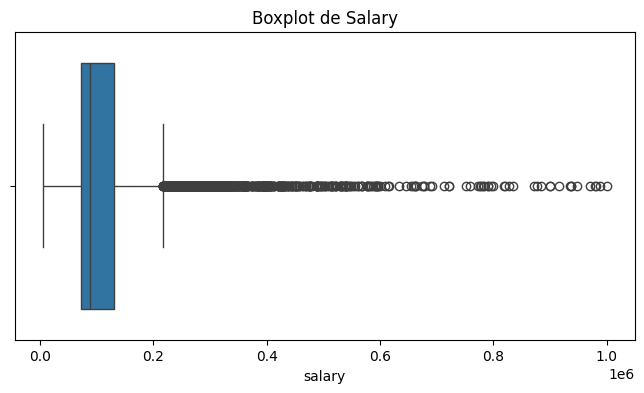

Percentiles de Salary: [ 27153.99  42153.4   71281.    88654.   129787.5  266921.05 503175.19]


In [ ]:
# Debido a la gran cantidad de outliers, procedemos a hacer un boxplot para visualizar outliers de Salary
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_rec_full["salary"])
plt.title("Boxplot de Salary")
plt.show()

# Cálculamos percentiles para ver distribución de valores extremos
percentiles = np.percentile(df_rec_full["salary"], [1, 5, 25, 50, 75, 95, 99])
print("Percentiles de Salary:", percentiles)

# Observamos una gran cantidad de outliers que debemos reducir antes de normalizar

In [ ]:
# Para evitar que estos outliers generen ruido, le aplicamos log1p
df_rec_full["salary_log"] = np.log1p(df_rec_full["salary"])

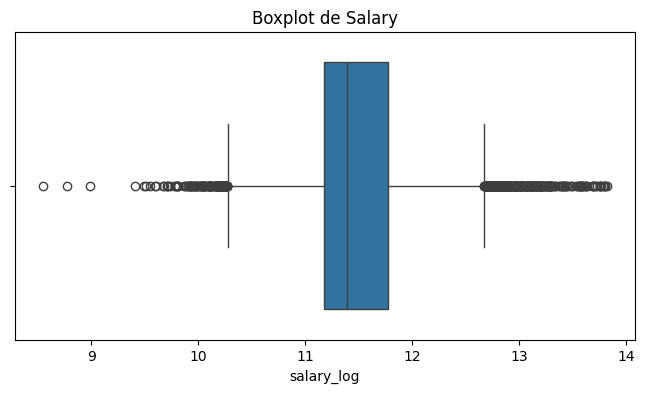

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_rec_full["salary_log"])
plt.title("Boxplot de Salary")
plt.show()

In [ ]:
# Sustituimos 'salary' y agregamos 'salary_log'
var_clustering = [v if v != "salary" else "salary_log" for v in var_clustering]
var_clustering

['age',
 'gender',
 'segment_encoded',
 'recomendado_encoded',
 'salary_log',
 'rentabilidad',
 'antiguedad_cliente']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_normalized = df_rec_full.copy()
df_normalized[var_clustering] = scaler.fit_transform(df_rec_full[var_clustering])

In [ ]:
df_normalized

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
0     1388319               0.912480                        0.917205   
1      762486               0.732833                        0.882906   
2     1122437               0.925454                        0.968641   
3     1138300               0.691790                        0.612079   
4     1004255               0.888487                        0.971119   
...       ...                    ...                             ...   
9995  1361426               0.007408                        0.037085   
9996  1177629               0.004380                        0.045467   
9997  1526045               0.739970                        0.659637   
9998  1343541               0.211565                        0.253224   
9999  1202701               0.557547                        0.596646   

      new_prestamos_tarjetas_nextmonth  rentabilidad  \
0                             0.774099      7.353611   
1                             0.784205      6.883957   
2                             0.666849      6.574940   
3                             0.924596      6.367004   
4                             0.633132      6.154492   
...                                ...           ...   
9995                          0.679687     -1.797358   
9996                          0.674588     -1.797528   
9997                          0.142404     -1.799049   
9998                          0.501403     -1.799173   
9999                          0.214773     -1.799378   

                           recomendado  active_customer  hdbscan_cluster  \
0       new_ahorro_inversion_nextmonth                1              0.0   
1       new_ahorro_inversion_nextmonth                1             -1.0   
2       new_ahorro_inversion_nextmonth                1              0.0   
3     new_prestamos_tarjetas_nextmonth                1             -1.0   
4       new_ahorro_inversion_nextmonth                1              0.0   
...                                ...              ...              ...   
9995  new_prestamos_tarjetas_nextmonth                1              6.0   
9996  new_prestamos_tarjetas_nextmonth                1              6.0   
9997             new_account_nextmonth                1              5.0   
9998  new_prestamos_tarjetas_nextmonth                1              0.0   
9999    new_ahorro_inversion_nextmonth                1              6.0   

     pk_partition entry_date entry_channel             segment  \
0      2019-05-28 2018-03-18           KHK   02 - PARTICULARES   
1      2019-05-28 2015-07-12           KFC   02 - PARTICULARES   
2      2019-05-28 2016-02-21           KAT   02 - PARTICULARES   
3      2019-05-28 2016-06-24           KFC   02 - PARTICULARES   
4      2019-05-28 2015-02-06           KFC   02 - PARTICULARES   
...           ...        ...           ...                 ...   
9995   2019-05-28 2017-11-26           KHE  03 - UNIVERSITARIO   
9996   2019-05-28 2016-09-17           KHE  03 - UNIVERSITARIO   
9997   2019-05-28 2019-01-20           KHM   02 - PARTICULARES   
9998   2019-05-28 2017-10-29           KAT            01 - TOP   
9999   2019-05-28 2016-10-18           KHE  03 - UNIVERSITARIO   

      short_term_deposit  loans  mortgage  funds  securities  \
0                      0      0         0      0           0   
1                      0      0         0      0           0   
2                      0      0         0      0           0   
3                      0      0         0      0           0   
4                      0      0         0      0           0   
...                  ...    ...       ...    ...         ...   
9995                   0      0         0      0           0   
9996                   0      0         0      0           0   
9997                   0      0         0      0           0   
9998                   0      0         0      0           0   
9999                   0      0         0      0           

In [ ]:
# Verificamos que la normalizacion haya funcionado, comprobándose así.
pd.set_option('display.float_format', '{:.6f}'.format)
df_normalized[var_clustering].describe().T

count      mean      std       min       25%  \
age                 10000.000000 -0.000000 1.000050 -1.495947 -0.744588   
gender              10000.000000 -0.000000 1.000050 -0.866430 -0.866430   
segment_encoded     10000.000000 -0.000000 1.000050 -2.209461 -0.424759   
recomendado_encoded 10000.000000 -0.000000 1.000050 -2.455955  0.502314   
salary_log          10000.000000  0.000000 1.000050 -5.296740 -0.557750   
rentabilidad        10000.000000  0.000000 1.000050 -1.799378 -0.737647   
antiguedad_cliente  10000.000000 -0.000000 1.000050 -2.169777 -0.762850   

                          50%      75%      max  
age                 -0.160198 0.591161 5.349765  
gender              -0.866430 1.154162 1.154162  
segment_encoded     -0.424759 1.359943 3.144644  
recomendado_encoded  0.502314 0.502314 0.502314  
salary_log          -0.163982 0.524144 4.210320  
rentabilidad         0.015438 0.669003 7.353611  
antiguedad_cliente   0.040763 0.924617 1.689015

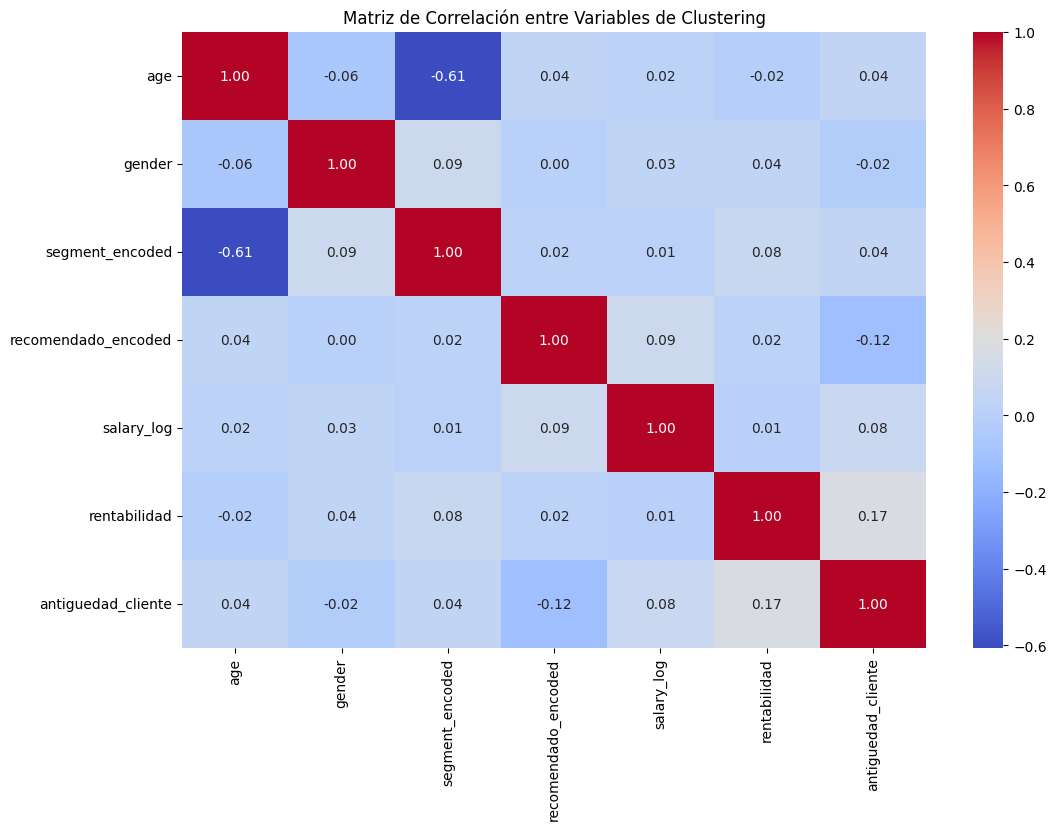

In [ ]:
# Matriz de correlación entre variables de clustering
plt.figure(figsize=(12,8))
sns.heatmap(df_normalized[var_clustering].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables de Clustering")
plt.show()


In [ ]:
var_clustering

['age',
 'gender',
 'segment_encoded',
 'recomendado_encoded',
 'salary_log',
 'rentabilidad',
 'antiguedad_cliente']

### Clustering General con HDBScan (Aprobado)

In [ ]:
# Debido a que tenemos aún muchos datos dispersos en forma de outliers,
#iniciamos la selección de modelo a través de HDBScan.
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=400,
                min_samples=10,
                cluster_selection_epsilon=1.70,
                gen_min_span_tree=True )

In [ ]:
df_normalized['hdbscan_clusters'] = clusterer.fit_predict(df_normalized[var_clustering])
print(df_normalized['hdbscan_clusters'].value_counts())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


hdbscan_clusters
 4    3712
 1    2555
 3    1474
 0    1449
-1     410
 2     400
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Aplicamos el clustering
df_normalized['hdbscan_clusters'] = clusterer.fit_predict(df_normalized[var_clustering])

# Extraemos los datos de los clusters y las etiquetas
X_clustered = df_normalized[var_clustering]
labels = df_normalized['hdbscan_clusters']

# Evaluamos el modelo con las tres métricas
silhouette_avg = silhouette_score(X_clustered, labels)
dbi_score = davies_bouldin_score(X_clustered, labels)
ch_score = calinski_harabasz_score(X_clustered, labels)

# Imprimimos los resultados
print(f"Silhouette Score: {silhouette_avg:.4f} (Más cercano a 1 es mejor)")
print(f"Davies-Bouldin Index: {dbi_score:.4f} (Más bajo es mejor)")
print(f"Calinski-Harabasz Index: {ch_score:.4f} (Más alto es mejor)")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Score: 0.1552 (Más cercano a 1 es mejor)
Davies-Bouldin Index: 2.9619 (Más bajo es mejor)
Calinski-Harabasz Index: 982.8207 (Más alto es mejor)


In [ ]:
df_normalized

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
0     1388319               0.912480                        0.917205   
1      762486               0.732833                        0.882906   
2     1122437               0.925454                        0.968641   
3     1138300               0.691790                        0.612079   
4     1004255               0.888487                        0.971119   
...       ...                    ...                             ...   
9995  1361426               0.007408                        0.037085   
9996  1177629               0.004380                        0.045467   
9997  1526045               0.739970                        0.659637   
9998  1343541               0.211565                        0.253224   
9999  1202701               0.557547                        0.596646   

      new_prestamos_tarjetas_nextmonth  rentabilidad  \
0                             0.774099      7.353611   
1                             0.784205      6.883957   
2                             0.666849      6.574940   
3                             0.924596      6.367004   
4                             0.633132      6.154492   
...                                ...           ...   
9995                          0.679687     -1.797358   
9996                          0.674588     -1.797528   
9997                          0.142404     -1.799049   
9998                          0.501403     -1.799173   
9999                          0.214773     -1.799378   

                           recomendado  active_customer  hdbscan_cluster  \
0       new_ahorro_inversion_nextmonth                1         0.000000   
1       new_ahorro_inversion_nextmonth                1        -1.000000   
2       new_ahorro_inversion_nextmonth                1         0.000000   
3     new_prestamos_tarjetas_nextmonth                1        -1.000000   
4       new_ahorro_inversion_nextmonth                1         0.000000   
...                                ...              ...              ...   
9995  new_prestamos_tarjetas_nextmonth                1         6.000000   
9996  new_prestamos_tarjetas_nextmonth                1         6.000000   
9997             new_account_nextmonth                1         5.000000   
9998  new_prestamos_tarjetas_nextmonth                1         0.000000   
9999    new_ahorro_inversion_nextmonth                1         6.000000   

     pk_partition entry_date entry_channel             segment  \
0      2019-05-28 2018-03-18           KHK   02 - PARTICULARES   
1      2019-05-28 2015-07-12           KFC   02 - PARTICULARES   
2      2019-05-28 2016-02-21           KAT   02 - PARTICULARES   
3      2019-05-28 2016-06-24           KFC   02 - PARTICULARES   
4      2019-05-28 2015-02-06           KFC   02 - PARTICULARES   
...           ...        ...           ...                 ...   
9995   2019-05-28 2017-11-26           KHE  03 - UNIVERSITARIO   
9996   2019-05-28 2016-09-17           KHE  03 - UNIVERSITARIO   
9997   2019-05-28 2019-01-20           KHM   02 - PARTICULARES   
9998   2019-05-28 2017-10-29           KAT            01 - TOP   
9999   2019-05-28 2016-10-18           KHE  03 - UNIVERSITARIO   

      short_term_deposit  loans  mortgage  funds  securities  \
0                      0      0         0      0           0   
1                      0      0         0      0           0   
2                      0      0         0      0           0   
3                      0      0         0      0           0   
4                      0      0         0      0           0   
...                  ...    ...       ...    ...         ...   
9995                   0      0         0      0           0   
9996                   0      0         0      0           0   
9997                   0      0         0      0           0   
9998                   0      0         0      0           0   
9999                   0      0         0      0           

#### Visualización Gráfica de Clusters Generales

In [ ]:
# Desnormalizamos los datos para poder observar los resultados
scaler = StandardScaler()
scaler.fit(df_rec_full[var_clustering])
hdbscan_df_denormalized = df_normalized.copy()
hdbscan_df_denormalized[var_clustering] = scaler.inverse_transform(df_normalized[var_clustering])

In [ ]:
hdbscan_df = hdbscan_df_denormalized.groupby('hdbscan_clusters')[var_clustering].mean()
hdbscan_df

age   gender  segment_encoded  recomendado_encoded  \
hdbscan_clusters                                                            
-1               47.012195 0.692683         0.651220             1.614634   
 0               26.871636 1.000000         2.000000             1.741201   
 1               41.610959 1.000000         1.000000             1.603914   
 2               51.002500 0.000000         0.000000             1.922500   
 3               26.820217 0.000000         2.000000             1.719132   
 4               41.682920 0.000000         1.000000             1.621228   

                  salary_log  rentabilidad  antiguedad_cliente  
hdbscan_clusters                                                
-1                 11.699325     55.800999          902.029268  
 0                 11.531838     52.646744          965.061422  
 1                 11.462406     52.117091          855.917025  
 2                 11.608311     49.765522          982.765000  
 3                 11.525635     52.126996          962.483718  
 4                 11.424692     51.824352          890.141433

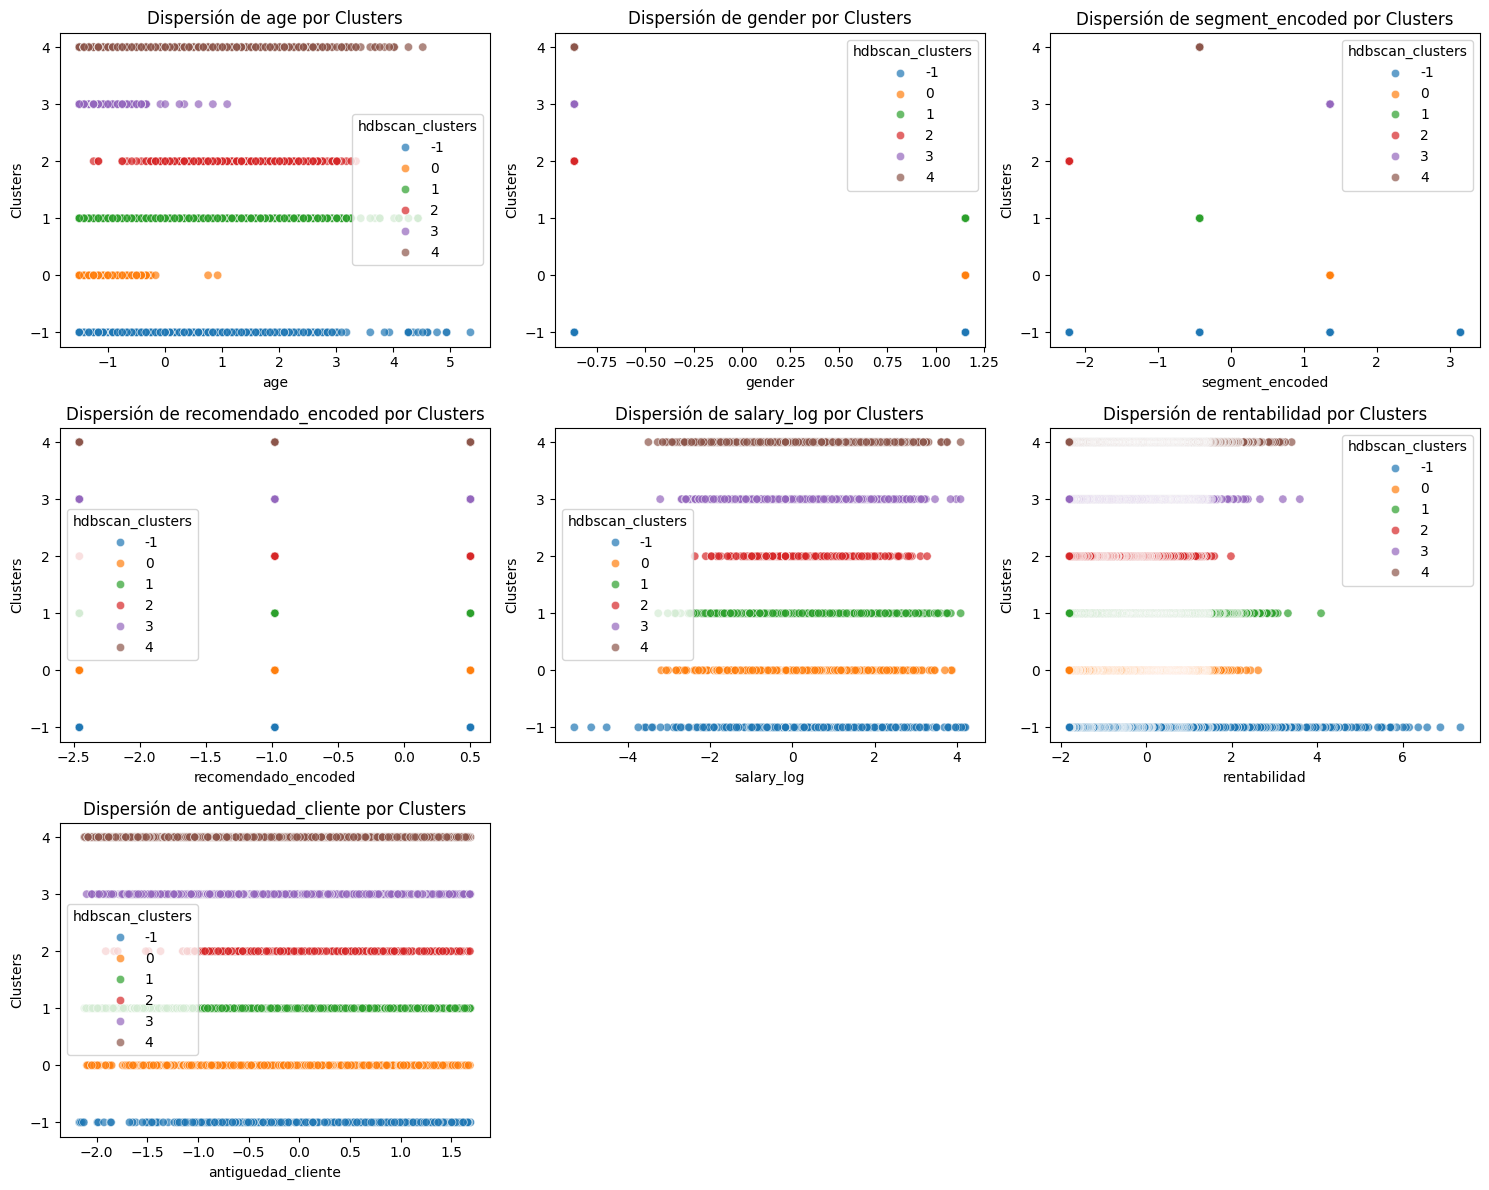

In [ ]:
# Define number of columns and calculate rows needed
cols = 3  # Number of columns per row (adjust based on preference)
rows = -(-len(var_clustering) // cols)  # Ceiling division to get total rows

# Create figure with dynamic size
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Flatten axes array for easier iteration (if multiple subplots)
axes = axes.flatten()

# Iterate over all variables in var_clustering
for i, var in enumerate(var_clustering):
    sns.scatterplot(
        data=df_normalized,
        x=var,
        y="hdbscan_clusters",
        hue="hdbscan_clusters",
        palette="tab10",
        alpha=0.7,
        ax=axes[i]
    )

    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Clusters")
    axes[i].set_title(f"Dispersión de {var} por Clusters")

# Remove any unused subplots (in case of empty spots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-42-4ed04b5e24e6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-42-4ed04b5e24e6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-42-4ed04b5e24e6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-42-4ed04b5e24e6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-42-4ed04b5e24e6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

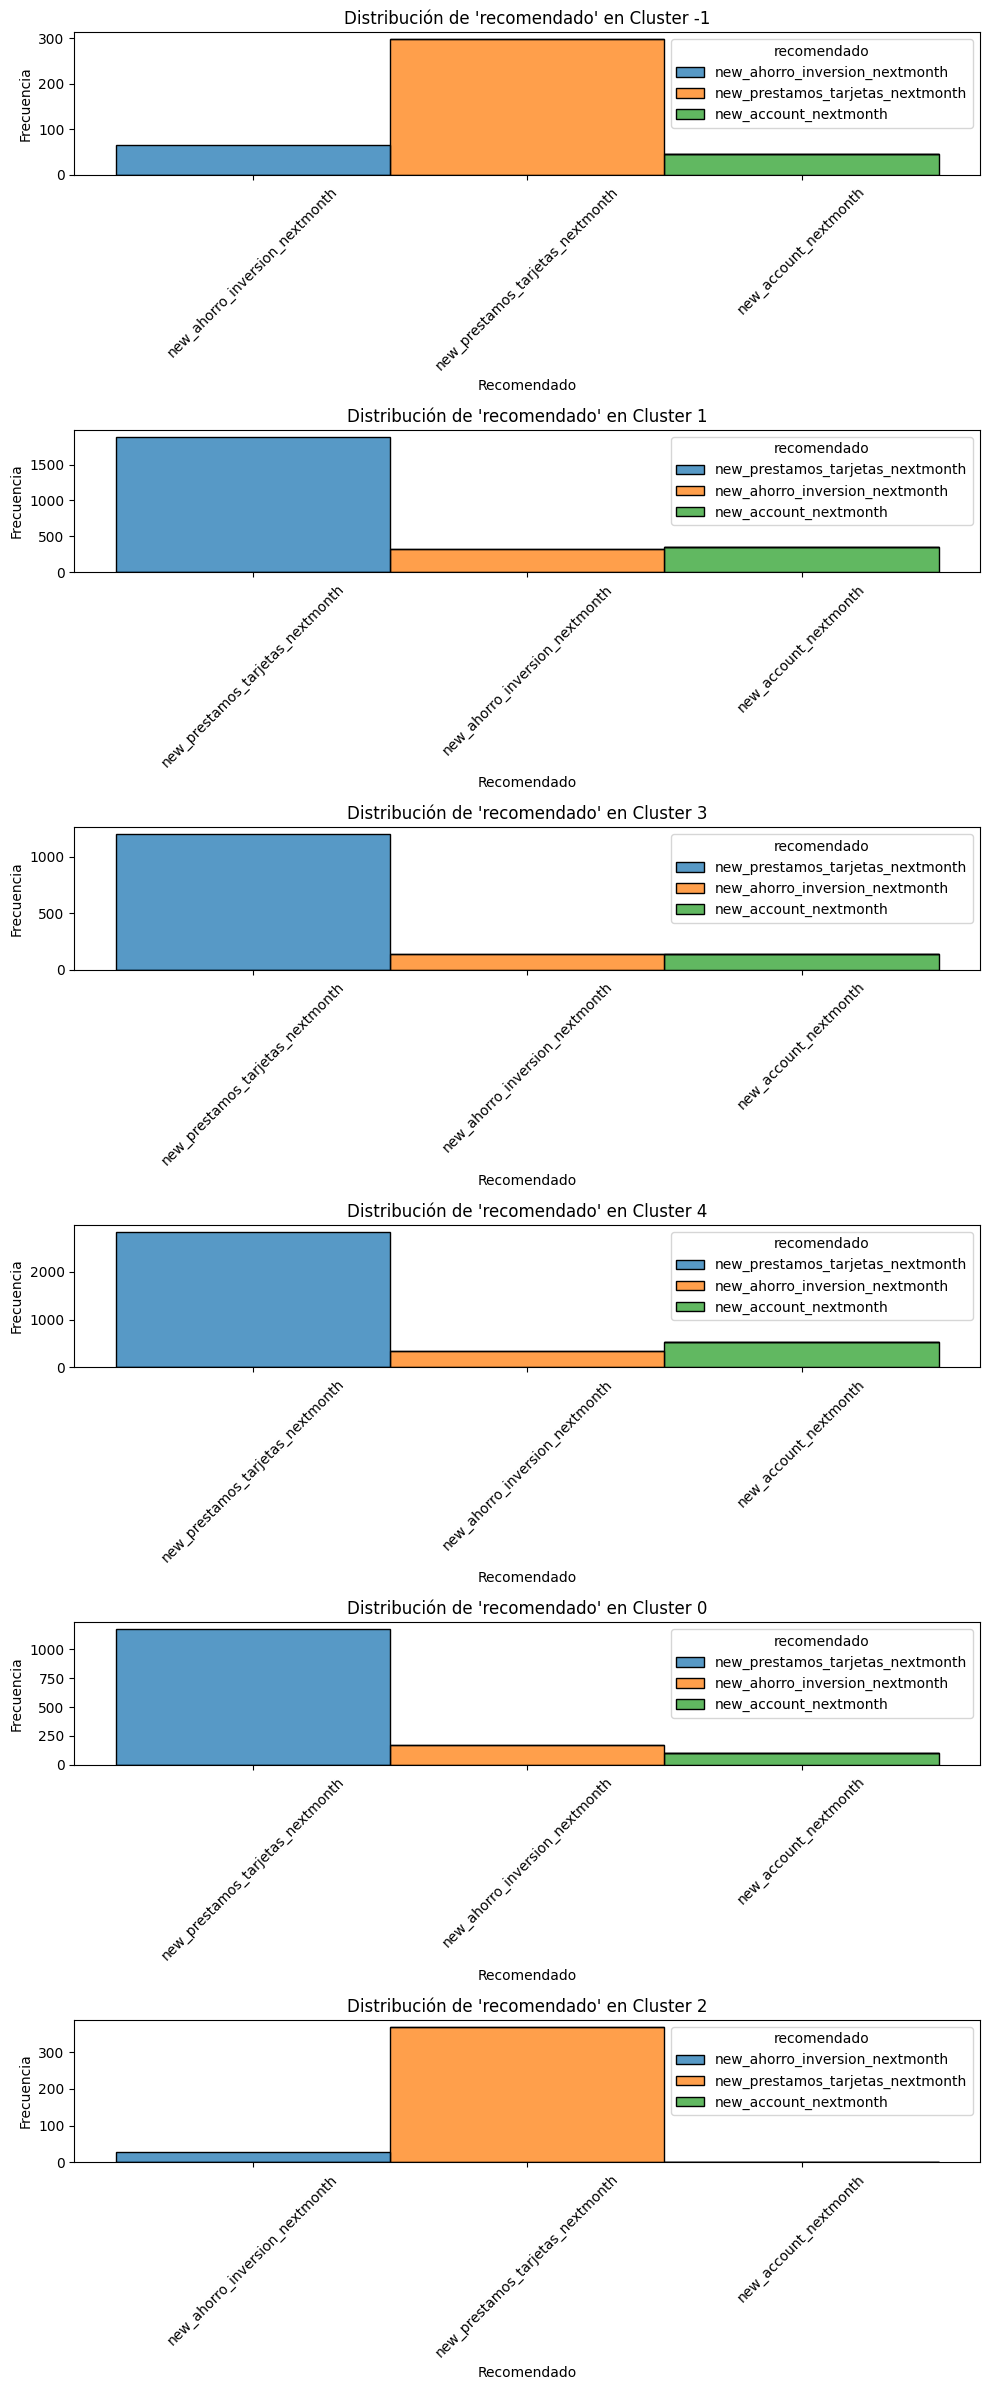

In [ ]:
# Ahora queremos observar como se distribuyen los 'recomendados' en cada cluster para determinar si esta segmentación general sirvió.
# Notamos que cada cluster desconsideró los productos recomendados, generando sesgo en todos hacia nuevos prestamos tarjetas.
# Esto requerirá que realicemos modelado a cada 'recomendado' individualmente.

clusters = hdbscan_df_denormalized['hdbscan_clusters'].unique()

num_clusters = len(clusters)
fig, axes = plt.subplots(nrows=num_clusters, figsize=(10, 4 * num_clusters))

if num_clusters == 1:
    axes = [axes]

for i, cluster in enumerate(clusters):
    ax = axes[i]
    subset = df_normalized[df_normalized['hdbscan_clusters'] == cluster]

    sns.histplot(data=subset, x='recomendado', hue='recomendado', multiple='stack', palette='tab10', ax=ax, bins=len(subset['recomendado'].unique()))

    ax.set_title(f"Distribución de 'recomendado' en Cluster {cluster}")
    ax.set_xlabel("Recomendado")
    ax.set_ylabel("Frecuencia")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

###Clustering Específicos con HDBScan (Descartado)

Para validar si una clusterización individual por segmento es más efectiva, probaremos modelar el segmento más grande y rentable a ver que resultados arroja.

#### New Prestamos Tarjetas Next Month

In [ ]:
df_prestamos_normalized = df_normalized[df_normalized['recomendado'] == 'new_prestamos_tarjetas_nextmonth'].copy()
df_prestamos_normalized = df_prestamos_normalized.drop(columns=['hdbscan_clusters'])
df_prestamos_filtered = df_prestamos_normalized[var_clustering]

cluster_prestamos = hdbscan.HDBSCAN(min_cluster_size=400,
                                    min_samples=10,
                                    cluster_selection_epsilon=1.7,
                                    cluster_selection_method='leaf').fit(df_prestamos_filtered)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
df_prestamos_normalized['hdbscan_clusters_prestamos'] = cluster_prestamos.labels_
df_prestamos_normalized

pk_cid  new_account_nextmonth  new_ahorro_inversion_nextmonth  \
3     1138300               0.691790                        0.612079   
5     1006888               0.627309                        0.525124   
6     1377265               0.752642                        0.725718   
7     1106936               0.202287                        0.691421   
11    1119987               0.777221                        0.586401   
...       ...                    ...                             ...   
9992  1158116               0.009228                        0.034902   
9993  1457126               0.012241                        0.009383   
9995  1361426               0.007408                        0.037085   
9996  1177629               0.004380                        0.045467   
9998  1343541               0.211565                        0.253224   

      new_prestamos_tarjetas_nextmonth  rentabilidad  \
3                             0.924596      6.367004   
5                             0.967386      6.081843   
6                             0.806292      6.010620   
7                             0.907330      5.861557   
11                            0.868057      5.713468   
...                                ...           ...   
9992                          0.680863     -1.797088   
9993                          0.697372     -1.797102   
9995                          0.679687     -1.797358   
9996                          0.674588     -1.797528   
9998                          0.501403     -1.799173   

                           recomendado  active_customer  hdbscan_cluster  \
3     new_prestamos_tarjetas_nextmonth                1        -1.000000   
5     new_prestamos_tarjetas_nextmonth                1         0.000000   
6     new_prestamos_tarjetas_nextmonth                1        -1.000000   
7     new_prestamos_tarjetas_nextmonth                1         0.000000   
11    new_prestamos_tarjetas_nextmonth                1        -1.000000   
...                                ...              ...              ...   
9992  new_prestamos_tarjetas_nextmonth                1         5.000000   
9993  new_prestamos_tarjetas_nextmonth                1         5.000000   
9995  new_prestamos_tarjetas_nextmonth                1         6.000000   
9996  new_prestamos_tarjetas_nextmonth                1         6.000000   
9998  new_prestamos_tarjetas_nextmonth                1         0.000000   

     pk_partition entry_date entry_channel             segment  \
3      2019-05-28 2016-06-24           KFC   02 - PARTICULARES   
5      2019-05-28 2015-02-28           KFC  03 - UNIVERSITARIO   
6      2019-05-28 2018-01-20           KAT   02 - PARTICULARES   
7      2019-05-28 2015-11-28           KHE   02 - PARTICULARES   
11     2019-05-28 2016-06-25           KAT   02 - PARTICULARES   
...           ...        ...           ...                 ...   
9992   2019-05-28 2016-08-06           KAT  03 - UNIVERSITARIO   
9993   2019-05-28 2018-09-22           KHM   02 - PARTICULARES   
9995   2019-05-28 2017-11-26           KHE  03 - UNIVERSITARIO   
9996   2019-05-28 2016-09-17           KHE  03 - UNIVERSITARIO   
9998   2019-05-28 2017-10-29           KAT            01 - TOP   

      short_term_deposit  loans  mortgage  funds  securities  \
3                      0      0         0      0           0   
5                      0      0         0      0           0   
6                      0      0         0      0           0   
7                      0      0         0      0           0   
11                     0      0         0      0           0   
...                  ...    ...       ...    ...         ...   
9992                   0      0         0      0           0   
9993                   0      0         0      0           0   
9995                   0      0         0      0           0   
9996                   0      0         0      0           0   
9998                   0      0         0      0           

In [ ]:
df_prestamos_normalized['hdbscan_clusters_prestamos'].value_counts()

hdbscan_clusters_prestamos
 3    2837
 0    1889
 2    1197
 1    1175
-1     670
Name: count, dtype: int64

In [ ]:
# Ajustamos el scaler con los datos originales antes de la normalización.
scaler.fit(df_rec_full[var_clustering])

# Creamos una copia del DataFrame segmentado.
df_prestamos_denormalized = df_prestamos_normalized.copy()

# Aplicamos la desnormalización.
df_prestamos_denormalized[var_clustering] = scaler.inverse_transform(df_prestamos_normalized[var_clustering])


In [ ]:
pd.set_option('display.max_rows', None)
df_prestamos_denormalized.groupby('hdbscan_clusters_prestamos')[var_clustering].describe().T

hdbscan_clusters_prestamos          -1           0           1           2  \
age                 count   670.000000 1889.000000 1175.000000 1197.000000   
                    mean     50.532836   42.313923   26.464681   26.444444   
                    std      13.201031   11.765921    3.679480    3.894894   
                    min      20.000000   20.000000   20.000000   20.000000   
                    25%      42.000000   34.000000   23.000000   23.000000   
                    50%      50.000000   40.000000   26.000000   26.000000   
                    75%      58.000000   49.000000   29.000000   30.000000   
                    max     102.000000   91.000000   49.000000   51.000000   
gender              count   670.000000 1889.000000 1175.000000 1197.000000   
                    mean      0.346269    1.000000    1.000000    0.000000   
                    std       0.476136    0.000000    0.000000    0.000000   
                    min       0.000000    1.000000    1.000000    0.000000   
                    25%       0.000000    1.000000    1.000000    0.000000   
                    50%       0.000000    1.000000    1.000000    0.000000   
                    75%       1.000000    1.000000    1.000000    0.000000   
                    max       1.000000    1.000000    1.000000    0.000000   
segment_encoded     count   670.000000 1889.000000 1175.000000 1197.000000   
                    mean      0.253731    1.000000    2.000000    2.000000   
                    std       0.672840    0.000000    0.000000    0.000000   
                    min       0.000000    1.000000    2.000000    2.000000   
                    25%       0.000000    1.000000    2.000000    2.000000   
                    50%       0.000000    1.000000    2.000000    2.000000   
                    75%       0.000000    1.000000    2.000000    2.000000   
                    max       3.000000    1.000000    2.000000    2.000000   
recomendado_encoded count   670.000000 1889.000000 1175.000000 1197.000000   
                    mean      2.000000    2.000000    2.000000    2.000000   
                    std       0.000000    0.000000    0.000000    0.000000   
                    min       2.000000    2.000000    2.000000    2.000000   
                    25%       2.000000    2.000000    2.000000    2.000000   
                    50%       2.000000    2.000000    2.000000    2.000000   
                    75%       2.000000    2.000000    2.000000    2.000000   
                    max       2.000000    2.000000    2.000000    2.000000   
salary_log          count   670.000000 1889.000000 1175.000000 1197.000000   
                    mean     11.651595   11.500233   11.536136   11.520406   
                    std       0.721145    0.544277    0.584346    0.594645   
                    min       8.776630    9.679281    9.720406    9.705463   
                    25%      11.306388   11.231808   11.183296   11.136077   
                    50%      11.500670   11.392508   11.451837   11.422246   
                    75%      12.058766   11.759223   11.876589   11.892608   
                    max      13.815439   13.750766   13.633917   13.748903   
rentabilidad        count   670.000000 1889.000000 1175.000000 1197.000000   
                    mean     51.716431   51.907697   53.176610   52.520721   
                    std       8.187481    4.768214    4.488298    4.979931   
                    min      42.328781   42.355556   42.337757   42.340153   
                    25%      46.483558   48.434067   50.782831   48.414738   
                    50%      49.706133   52.074821   54.095718   53.777302   
                    75%      53.650213   55.437378   56.394476   56.379692   
                    max      86.876823   74.461815   66.434517   69.587196   
antiguedad_cliente  count   670.000000 1889.000000 1175.000000 1197.000000   
                    mean    954.132836  799.967178  946.932766  940.218881   
                    st

##### Validación de Modelo

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Filtramos outliers/noise (-1) ya que afectan negativamente las métricas.
df_prestamos_filtered = df_prestamos_denormalized[df_prestamos_denormalized['hdbscan_clusters_prestamos'] != -1]
X_clustered = df_prestamos_filtered[var_clustering]
labels = df_prestamos_filtered['hdbscan_clusters_prestamos']

# Cálculo de métricas.
silhouette_avg = silhouette_score(X_clustered, labels)
dbi_score = davies_bouldin_score(X_clustered, labels)
ch_score = calinski_harabasz_score(X_clustered, labels)

# Imprimimos los resultados.
print(f"Silhouette Score: {silhouette_avg:.4f} (Más cercano a 1 es mejor)")
print(f"Davies-Bouldin Index: {dbi_score:.4f} (Más bajo es mejor)")
print(f"Calinski-Harabasz Index: {ch_score:.4f} (Más alto es mejor)")

Silhouette Score: -0.0904 (Más cercano a 1 es mejor)
Davies-Bouldin Index: 50.6310 (Más bajo es mejor)
Calinski-Harabasz Index: 43.7911 (Más alto es mejor)


Después de diversas pruebas de hiperparámetros notamos que las métricas obtenidas no son buenas. Siendo la actual, la mejor métrica obtenida hasta ahora. Considerando que este es el segmento más amplio, podemos descartar que esta alternativa sea funcional tanto a nivel técnico (requiere muchos ajustes para efectuarse) ni a nivel de volumen (si el segmento más amplio tiene tal sobresolapamiento, los más pequeños tendrán problemas aún mayores).

Debido a la cantidad de outliers, también descartamos la posibilidad de realizar la segmentación específica a nivel de K-means.

### Análisis Detallado de Demográficos/Segmentos/Clusters

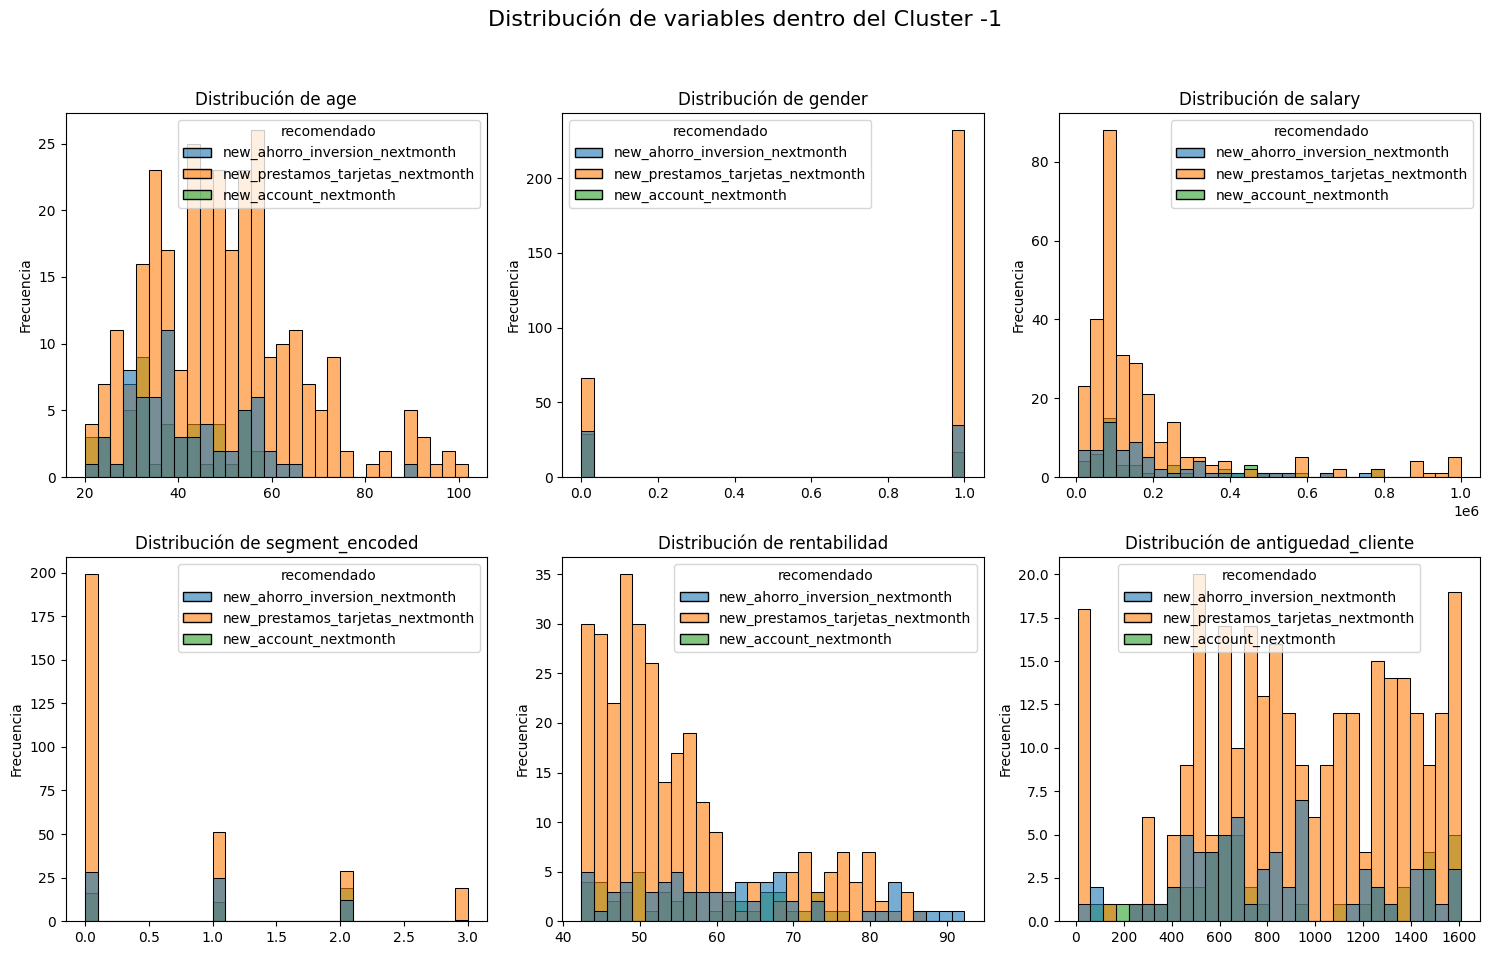

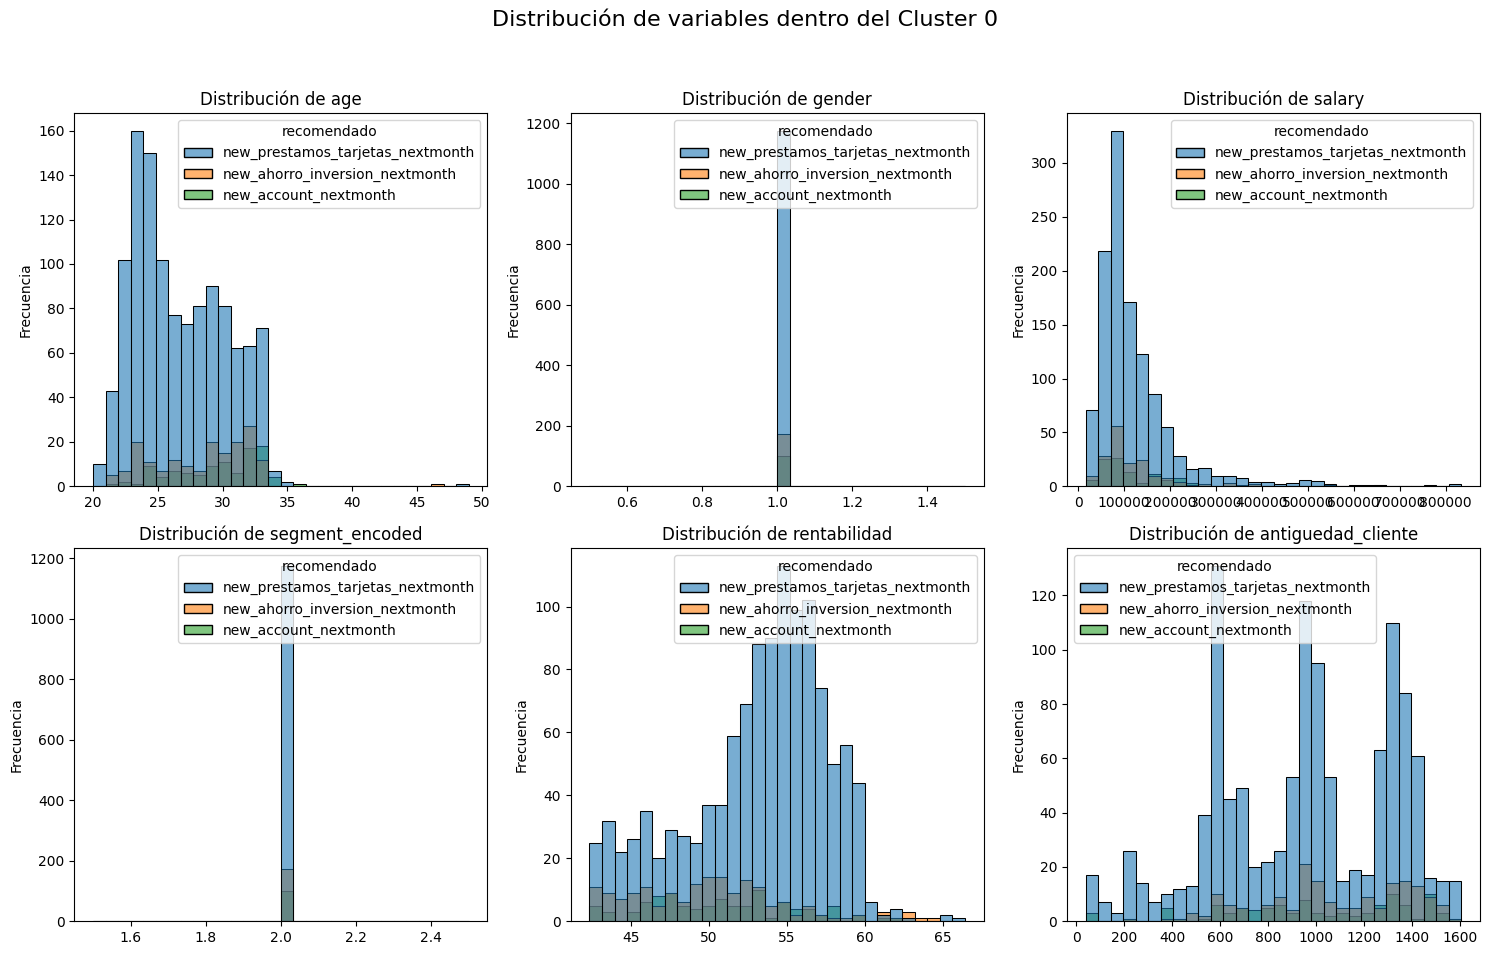

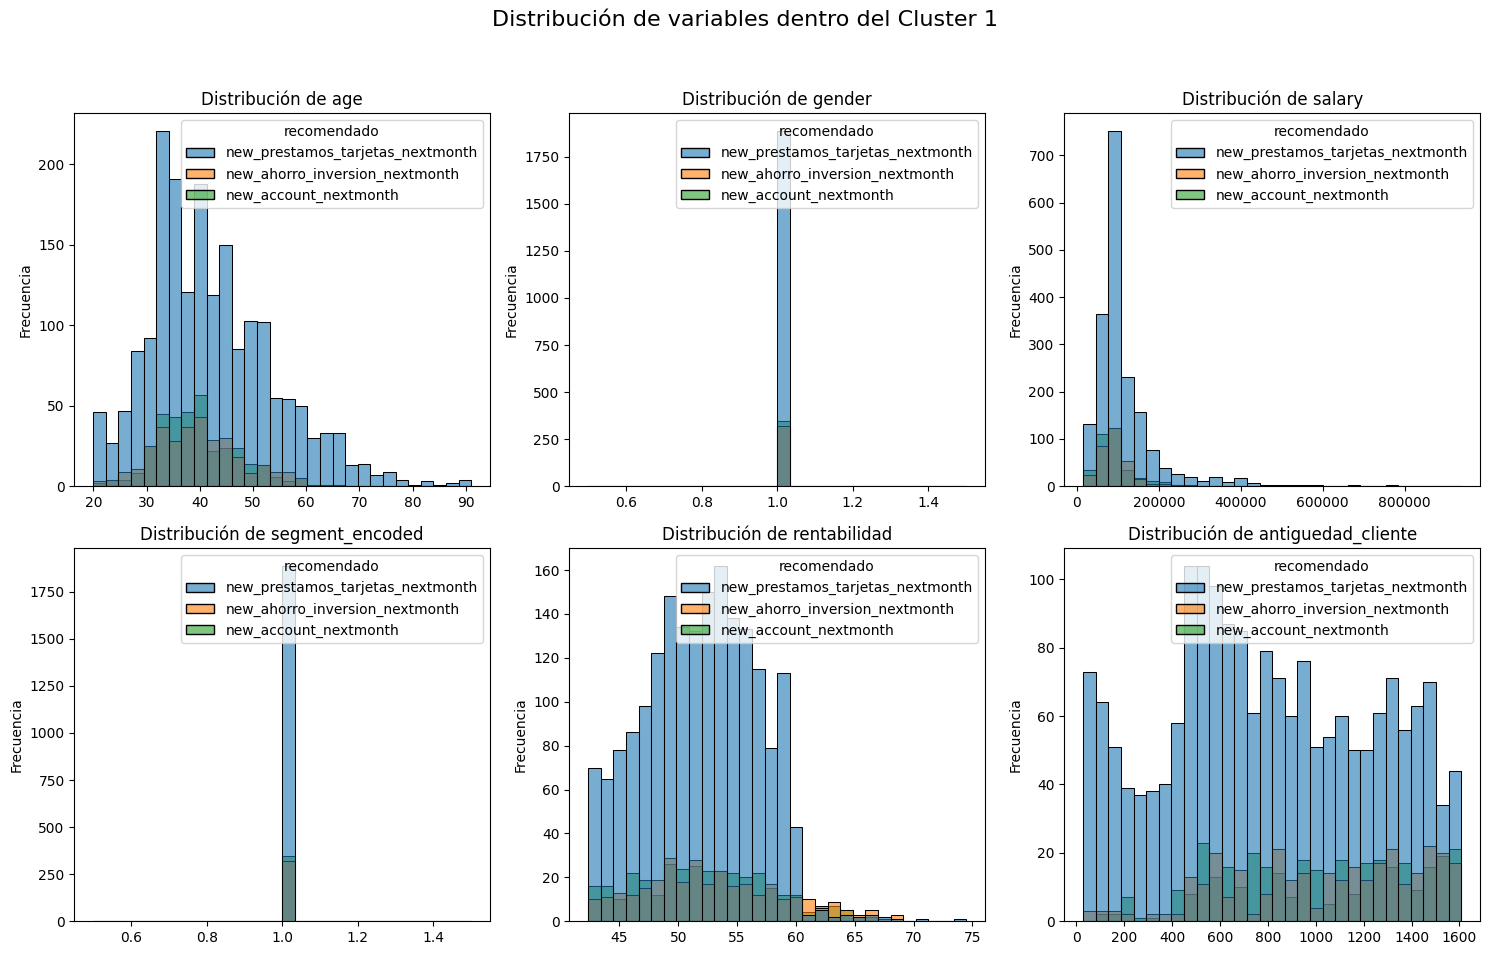

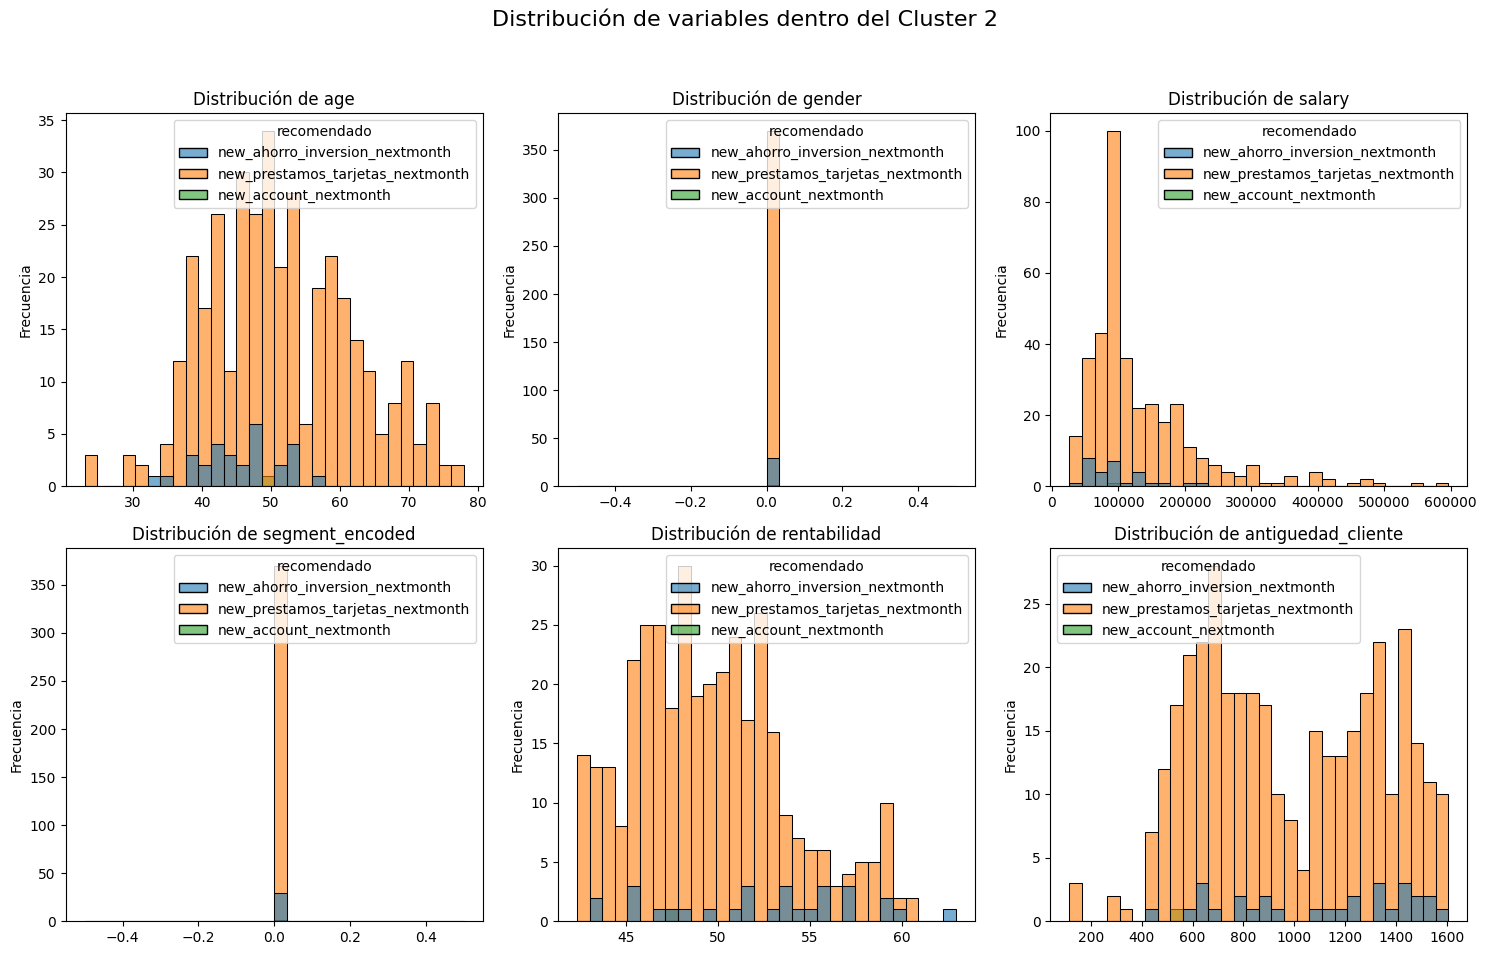

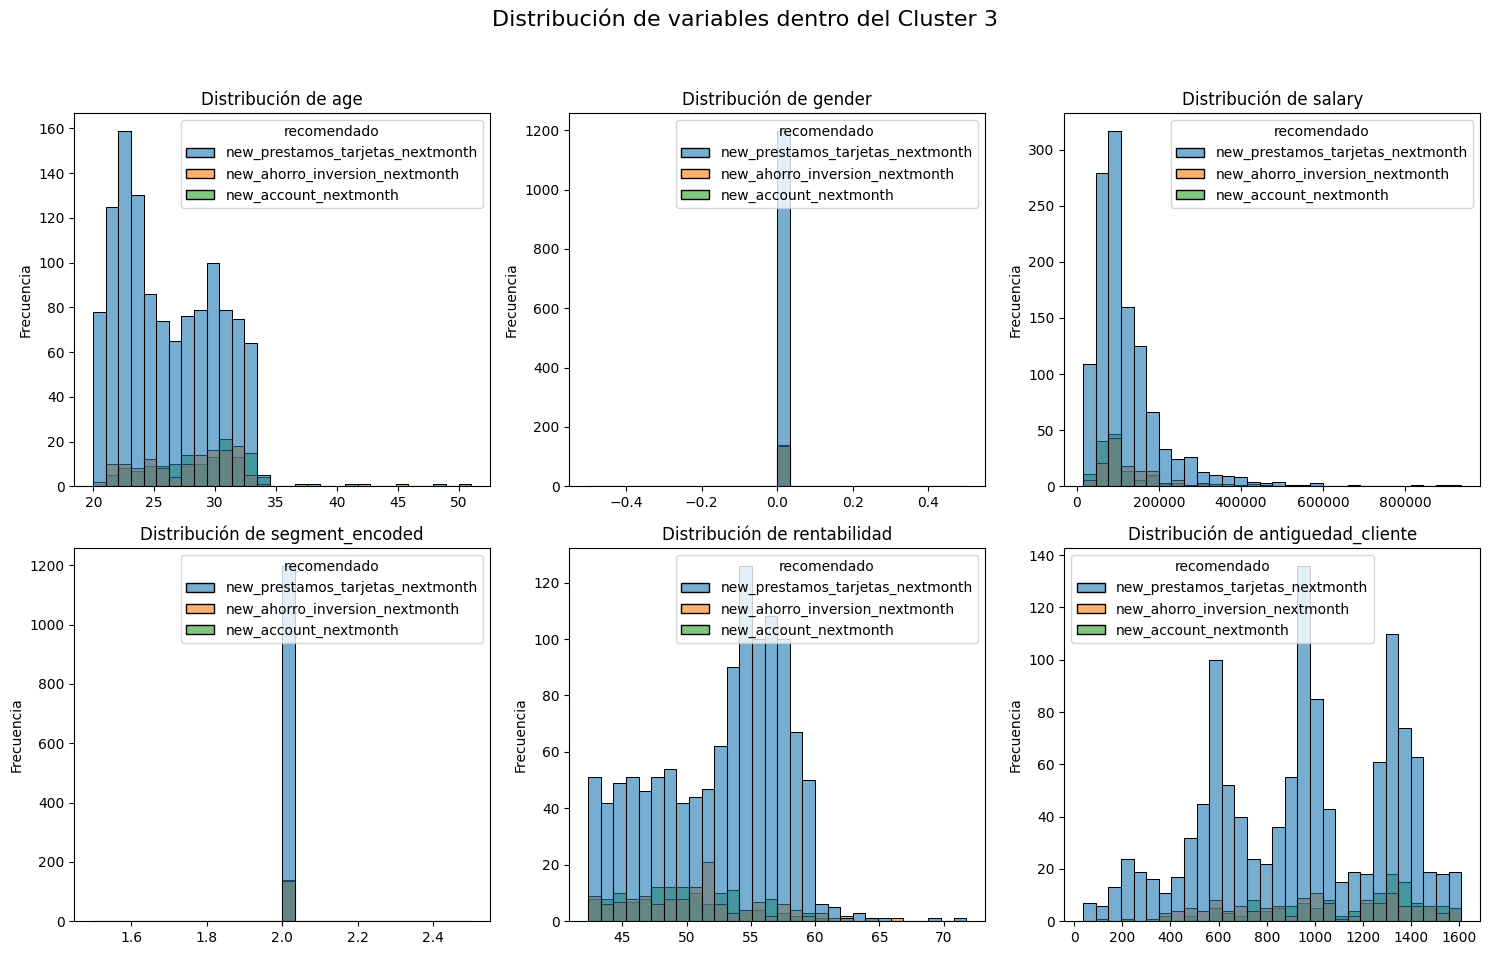

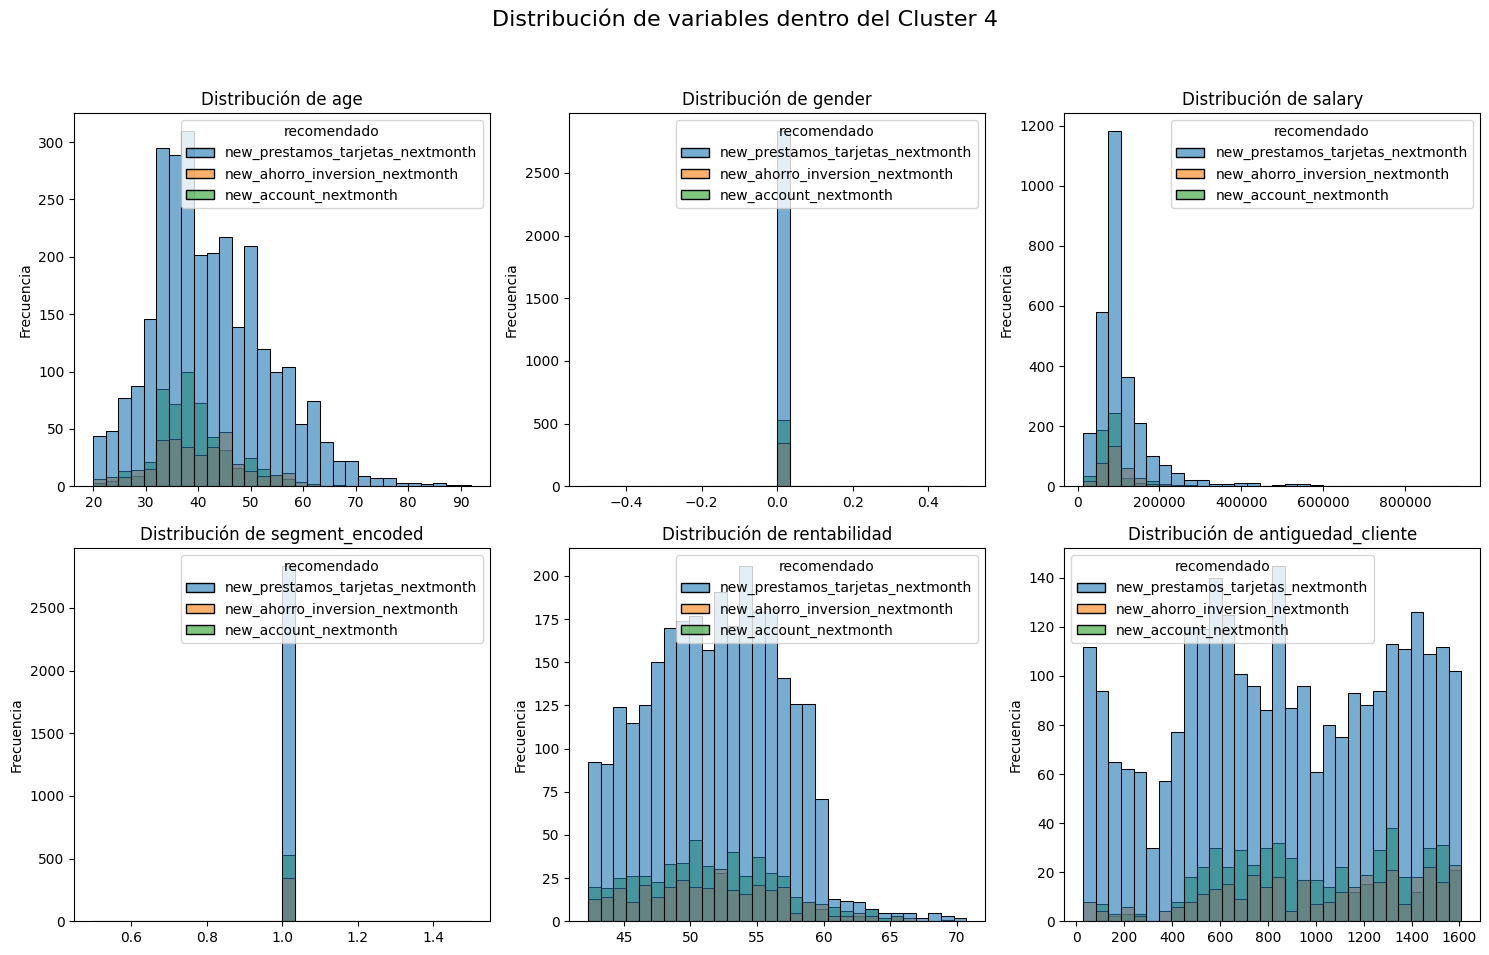

In [ ]:
# Definimos las variables a analizar
vars_to_plot = ['age', 'gender', 'salary', 'segment_encoded', 'rentabilidad', 'antiguedad_cliente']

# Extraemos los clusters únicos (excluyendo -1 si es necesario)
clusters = sorted(hdbscan_df_denormalized["hdbscan_clusters"].unique())

# Iteramos sobre cada cluster para generar gráficos separados
for cluster in clusters:
    df_cluster = hdbscan_df_denormalized[hdbscan_df_denormalized["hdbscan_clusters"] == cluster]

    # Ajustamos la cantidad de filas según el número de variables
    n_vars = len(vars_to_plot)
    n_cols = 3  # Número de columnas
    n_rows = (n_vars // n_cols) + (n_vars % n_cols > 0)  # Calculamos filas dinámicamente

    # Crear la figura con subgráficos
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    fig.suptitle(f"Distribución de variables dentro del Cluster {cluster}", fontsize=16)

    # Asegurar que axes es un arreglo 1D para indexarlo correctamente
    axes = axes.flatten()

    # Iteramos sobre las variables y ejes de los subgráficos
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        sns.histplot(data=df_cluster, x=var, hue="recomendado", bins=30, palette="tab10", alpha=0.6, ax=ax)
        ax.set_title(f"Distribución de {var}")
        ax.set_xlabel("")
        ax.set_ylabel("Frecuencia")

    # Ocultamos los subgráficos vacíos si hay menos gráficos que espacios en la grilla
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el diseño para evitar solapamientos
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
# Definir rangos para agrupar edades y salarios
age_bins = [0, 25, 45, 60, float('inf')]
age_labels = ['0-25', '25-45', '45-60', '60+']

salary_bins = [0, 20000, 50000, 100000, 300000, 1000000]
salary_labels = ['0-20k', '20k-50k', '50k-100k', '100k-300k', '300k-1000k']

# Crear nuevas columnas agrupadas
hdbscan_df_denormalized['age_group'] = pd.cut(hdbscan_df_denormalized['age'], bins=age_bins, labels=age_labels, right=False)
hdbscan_df_denormalized['salary_group'] = pd.cut(hdbscan_df_denormalized['salary'], bins=salary_bins, labels=salary_labels, right=False)

# Variables a analizar
selected_vars = ['age_group', 'salary_group', 'gender', 'recomendado', 'segment']

# Crear lista de dataframes por variable
dfs = []

for var in selected_vars:
    temp_df = (
        hdbscan_df_denormalized.groupby(['hdbscan_clusters', var])
        .size()
        .unstack(level=0, fill_value=0)
    )

    # Convertir a porcentaje dentro de cada cluster
    temp_df = temp_df.div(temp_df.sum(axis=0), axis=1).mul(100).round(0).astype(int)

    # Añadir una columna para identificar la variable
    temp_df.insert(0, 'Variable', var)

    # Añadir al listado de dataframes
    dfs.append(temp_df)

# Concatenar todas las variables en una sola tabla
final_df = pd.concat(dfs)

# Renombrar el índice para mayor claridad
final_df = final_df.reset_index().rename(columns={'index': 'Category'})

# Mostrar la tabla corregida
#from IPython.display import display
display(final_df)


<ipython-input-50-4853f49cd86c>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hdbscan_df_denormalized.groupby(['hdbscan_clusters', var])
<ipython-input-50-4853f49cd86c>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hdbscan_df_denormalized.groupby(['hdbscan_clusters', var])
<ipython-input-50-4853f49cd86c>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hdbscan_df_denormalized.groupby(['hdbscan_clusters', var])


hdbscan_clusters                          Category      Variable  -1    0  \
0                                             0-25     age_group   4   36   
1                                            25-45     age_group  43   64   
2                                            45-60     age_group  37    0   
3                                              60+     age_group  16    0   
4                                            0-20k  salary_group   3    0   
5                                          20k-50k  salary_group   9    9   
6                                         50k-100k  salary_group  36   45   
7                                        100k-300k  salary_group  37   41   
8                                       300k-1000k  salary_group  15    4   
9                                         0.000000        gender  31    0   
10                                        1.000000        gender  69  100   
11                           new_account_nextmonth   recomendado  11    7   
12                  new_ahorro_inversion_nextmonth   recomendado  16   12   
13                new_prestamos_tarjetas_nextmonth   recomendado  73   81   
14                                        01 - TOP       segment  59    0   
15                               02 - PARTICULARES       segment  21    0   
16                              03 - UNIVERSITARIO       segment  15  100   
17                                         Unknown       segment   5    0   

hdbscan_clusters    1    2    3    4  
0                   3    1   37    3  
1                  63   28   63   63  
2                  27   50    0   28  
3                   7   21    0    6  
4                   0    0    0    0  
5                   9    5   11    9  
6                  55   48   43   59  
7                  32   42   41   30  
8                   4    4    4    2  
9                   0  100  100  100  
10                100    0    0    0  
11                 14    0    9   14  
12                 13    7    9    9  
13                 74   92   81   76  
14                  0  100    0    0  
15                100    0    0  100  
16                  0    0  100    0  
17                  0    0    0    0

#### Conclusiones Cualitativas

**Cluster -1:** Grupo Mixto con Alta Presencia Femenina
Este grupo está compuesto mayoritariamente por adultos de 45 años o más (53%), con un 69% de mujeres. Distribución de ingresos amplia, concentrada entre 50k-300k (73%), un 15% alcanza ingresos superiores a 300k. 59% en el segmento TOP, reflejando una clientela de alto valor. La principal recomendación para este grupo son new_prestamos tarjetas (73%), seguido de new_ahorro_inversion (16%)

**Cluster 0:** Mujeres Jovenes Universitarias con Ingresos Medios
Grupo compuesto exclusivamente por universitarias (100%), con una mayoría de jóvenes entre 25 y 45 años (64%). Es un segmento homogéneo con 100% de mujeres y se caracteriza por ingresos mayormente en el rango 50k-100k (45%) y algunos con ingresos superiores hasta 300k (41%). La recomendación predominante para este grupo son los new_prestamos tarjetas (81%), seguido de new_ahorro_inversion (12%)

**Cluster 1:** Mujeres Particulares con Ingresos Medios
Está compuesto principalmente por adultos de 25 a 45 años (63%), con una mayoría femenina (100%). Este grupo pertenece en su totalidad al segmento PARTICULARES (100%), lo que sugiere que son clientes con un perfil más tradicional. Sus ingresos se distribuyen entre 50k-100k (55%) y 100k-300k (32%), con un enfoque fuerte en new_prestamos tarjetas (74%), seguido de new_account (14%)

**Cluster 2:** Hombres de Alto Ingreso en Segmento Exclusivo
Este cluster agrupa a adultos de 45 años o más (71%), con 100% de hombres y predominancia en el segmento TOP (100%), lo que indica clientes de alto valor. Sus ingresos son los más altos dentro del análisis, con una fuerte presencia en el rango 50k-300k (84%), aunque una pequeña fracción supera los 300k (4%). La recomendación predominante en este grupo son new_prestamos tarjetas (92%), seguido de new_ahorro (7%)

**Cluster 3:** Hombres Jóvenes Universitarios con Ingresos Medios
Grupo compuesto exclusivamente por universitarios (100%), con una mayoría de jóvenes entre 25 y 45 años (63%). La totalidad de este cluster es masculino (100%), con ingresos concentrados en el rango 50k-100k (43%) y 100k-300k (41%).  La recomendación predominante en este grupo son new_prestamos tarjetas (92%), seguido de new_ahorro y new_account (9% cada uno)

**Cluster 4:** Hombres Particulares con Ingresos Medios
Este grupo presenta una mezcla de jóvenes y adultos (63% entre 25 y 45 años), con una distribución más balanceada en edad. Se encuentra exclusivamente en el segmento PARTICULARES (100%) y cuenta con 100% de hombres. En términos financieros, sus ingresos están mayormente en el rango 50k-100k (59%) y 100k-300k (30%).  La recomendación predominante en este grupo son new_prestamos tarjetas (76%), seguido de new_account (14%)

# Segmentacion Recomendada

Debido a que tenemos una diversidad de 6 clusters con 3 productos cada uno, la cantidad de creativos llegaría a 18 si queremos ser muy especifico. Debido a que la solicitud es de generar 5-6 creativos, y que adicionalmente el volumen de recomendados para new_ahorro y new_account es considerablemente más bajo. Se recomienda una estrategia de campaña de productos mixta para cada cluster.

Consideraremos principalmente las caracteristicas de cada cluster para segmentar la comunicacion con base a sus demográficos.

Adicionalmente a nivel de productos a recomendar, sugerimos dos enfoques, del cual sólo desarrollamos el primero:

1. Comunicar multiples productos basado en la preponderancia del recomendado del cluster. Por ejemplo: Cluster -1 se enfocaría en comunicar sobre new_prestamos_tarjetas y sobre new_ahorro_inversión. Dándole mayor importancia en la comunicacion al que tiene más peso de los dos.

2. Debido al bajo volumen de new_ahorro y new_account. Sugerimos separarlos del metodo de clusters, aplicándolo solo a new_prestamos_tarjetas, y usando una sola comunicación para los otros dos recomendados. Sin embargo esta alternativa utilizando metodos de HDBScan no probó fructífera.

Abajo detallamos como se enfocaría la segmentación bajo la opción 1


**Cluster -1: Grupo Mixto con Alta Presencia Femenina**
Edad: Mayoritariamente adultos de 45 años o más (53%)

Género: 69% mujeres

Ingresos: Amplia distribución, con 73% entre 50k-300k y un 15% supera los 300k

Segmento: 59% en el segmento TOP, clientes de alto valor

Recomendación: Principalmente new_prestamos_tarjetas (73%), seguido de new_ahorro_inversion (16%)




---


**Cluster 0: Mujeres Jóvenes Universitarias con Ingresos Medios**

Edad: 64% entre 25 y 45 años

Género: 100% mujeres

Ingresos: 45% entre 50k-100k y 41% entre 100k-300k

Segmento: 100% universitarias

Recomendación: Predominante en new_prestamos_tarjetas (81%), seguido de new_ahorro_inversion (12%)



---


**Cluster 1: Mujeres Particulares con Ingresos Medios**

Edad: 63% entre 25 y 45 años

Género: 100% mujeres

Ingresos: 55% entre 50k-100k y 32% entre 100k-300k

Segmento: 100% en PARTICULARES

Recomendación: Principalmente new_prestamos_tarjetas (74%), seguido de new_account (14%)



---


**Cluster 2: Hombres de Alto Ingreso en Segmento Exclusivo**

Edad: 71% de 45 años o más

Género: 100% hombres

Ingresos: 84% entre 50k-300k, con un 4% superando los 300k

Segmento: 100% en TOP, clientes de alto valor

Recomendación: Principalmente new_prestamos_tarjetas (92%), seguido de new_ahorro_inversion (7%)


---



**Cluster 3: Hombres Jóvenes Universitarios con Ingresos Medios**

Edad: 63% entre 25 y 45 años

Género: 100% hombres

Ingresos: 43% entre 50k-100k y 41% entre 100k-300k

Segmento: 100% universitarios

Recomendación: new_prestamos_tarjetas (92%), seguido de new_ahorro_inversion y new_account (9% cada uno)



---


**Cluster 4: Hombres Particulares con Ingresos Medios**

Edad: 63% entre 25 y 45 años

Género: 100% hombres

Ingresos: 59% entre 50k-100k y 30% entre 100k-300k

Segmento: 100% en PARTICULARES

Recomendación: new_prestamos_tarjetas (76%), seguido de new_account (14%)


Los clusters creados se han guardo en distintos dataframes para agilizar su posterior uso.

In [ ]:
df_cluster_neg1 = hdbscan_df_denormalized[hdbscan_df_denormalized['hdbscan_clusters'] == -1][['pk_cid', 'hdbscan_clusters']]
df_cluster_neg1.reset_index(drop=True, inplace=True)
df_cluster_neg1.to_csv('cluster_neg1.csv', index=False)
files.download('cluster_neg1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cluster_0 = hdbscan_df_denormalized[hdbscan_df_denormalized['hdbscan_clusters'] == 0][['pk_cid', 'hdbscan_clusters']]
df_cluster_0.reset_index(drop=True, inplace=True)
df_cluster_0.to_csv('cluster_0.csv', index=False)
files.download('cluster_0.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cluster_1 = hdbscan_df_denormalized[hdbscan_df_denormalized['hdbscan_clusters'] == 0][['pk_cid', 'hdbscan_clusters']]
df_cluster_1.reset_index(drop=True, inplace=True)
df_cluster_1.to_csv('cluster_1.csv', index=False)
files.download('cluster_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cluster_2 = hdbscan_df_denormalized[hdbscan_df_denormalized['hdbscan_clusters'] == 0][['pk_cid', 'hdbscan_clusters']]
df_cluster_2.reset_index(drop=True, inplace=True)
df_cluster_2.to_csv('cluster_2.csv', index=False)
files.download('cluster_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cluster_1 = hdbscan_df_denormalized[hdbscan_df_denormalized['hdbscan_clusters'] == 0][['pk_cid', 'hdbscan_clusters']]
df_cluster_1.reset_index(drop=True, inplace=True)
df_cluster_1.to_csv('cluster_1.csv', index=False)
files.download('cluster_1.csv')